In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [16]:
product = 'BATS_vix'
order   = '(2,2)'

In [17]:
forcast_df         = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\forecasts_vix_(1, 0)_True_5.csv',parse_dates=True,index_col='asofdate')
metadata_df        = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\metadata_vix_(1, 0)_True_5.csv',parse_dates=True,index_col='asofdate')
# metadatasummary_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_projects\arma_ma\backtest\output\stocks\metadatasummary_vix_arma_(2,2).csv',parse_dates=True)
pnl_df             = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\pnl_armaspreadthreshold_vix_(1, 0)_True_5.csv',parse_dates=True,index_col='asofdate')
# positions_df       = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_projects\arma_ma\backtest\output\stocks\positions_vix_arma_ma50_(2,2).csv',parse_dates=True,index_col='asofdate')
trade_pnl          = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\tradelevelpnl_armaspreadthreshold_vix_(1, 0)_True_5.csv',parse_dates=True,index_col='asofdate') 
# performance_df     = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_projects\arma_ma\backtest\output\stocks\tradeperformance_vix_arma_ma50_(2,2).csv',parse_dates=True)

In [18]:
metadatasummary_df

NameError: name 'metadatasummary_df' is not defined

In [19]:
performance_df

NameError: name 'performance_df' is not defined

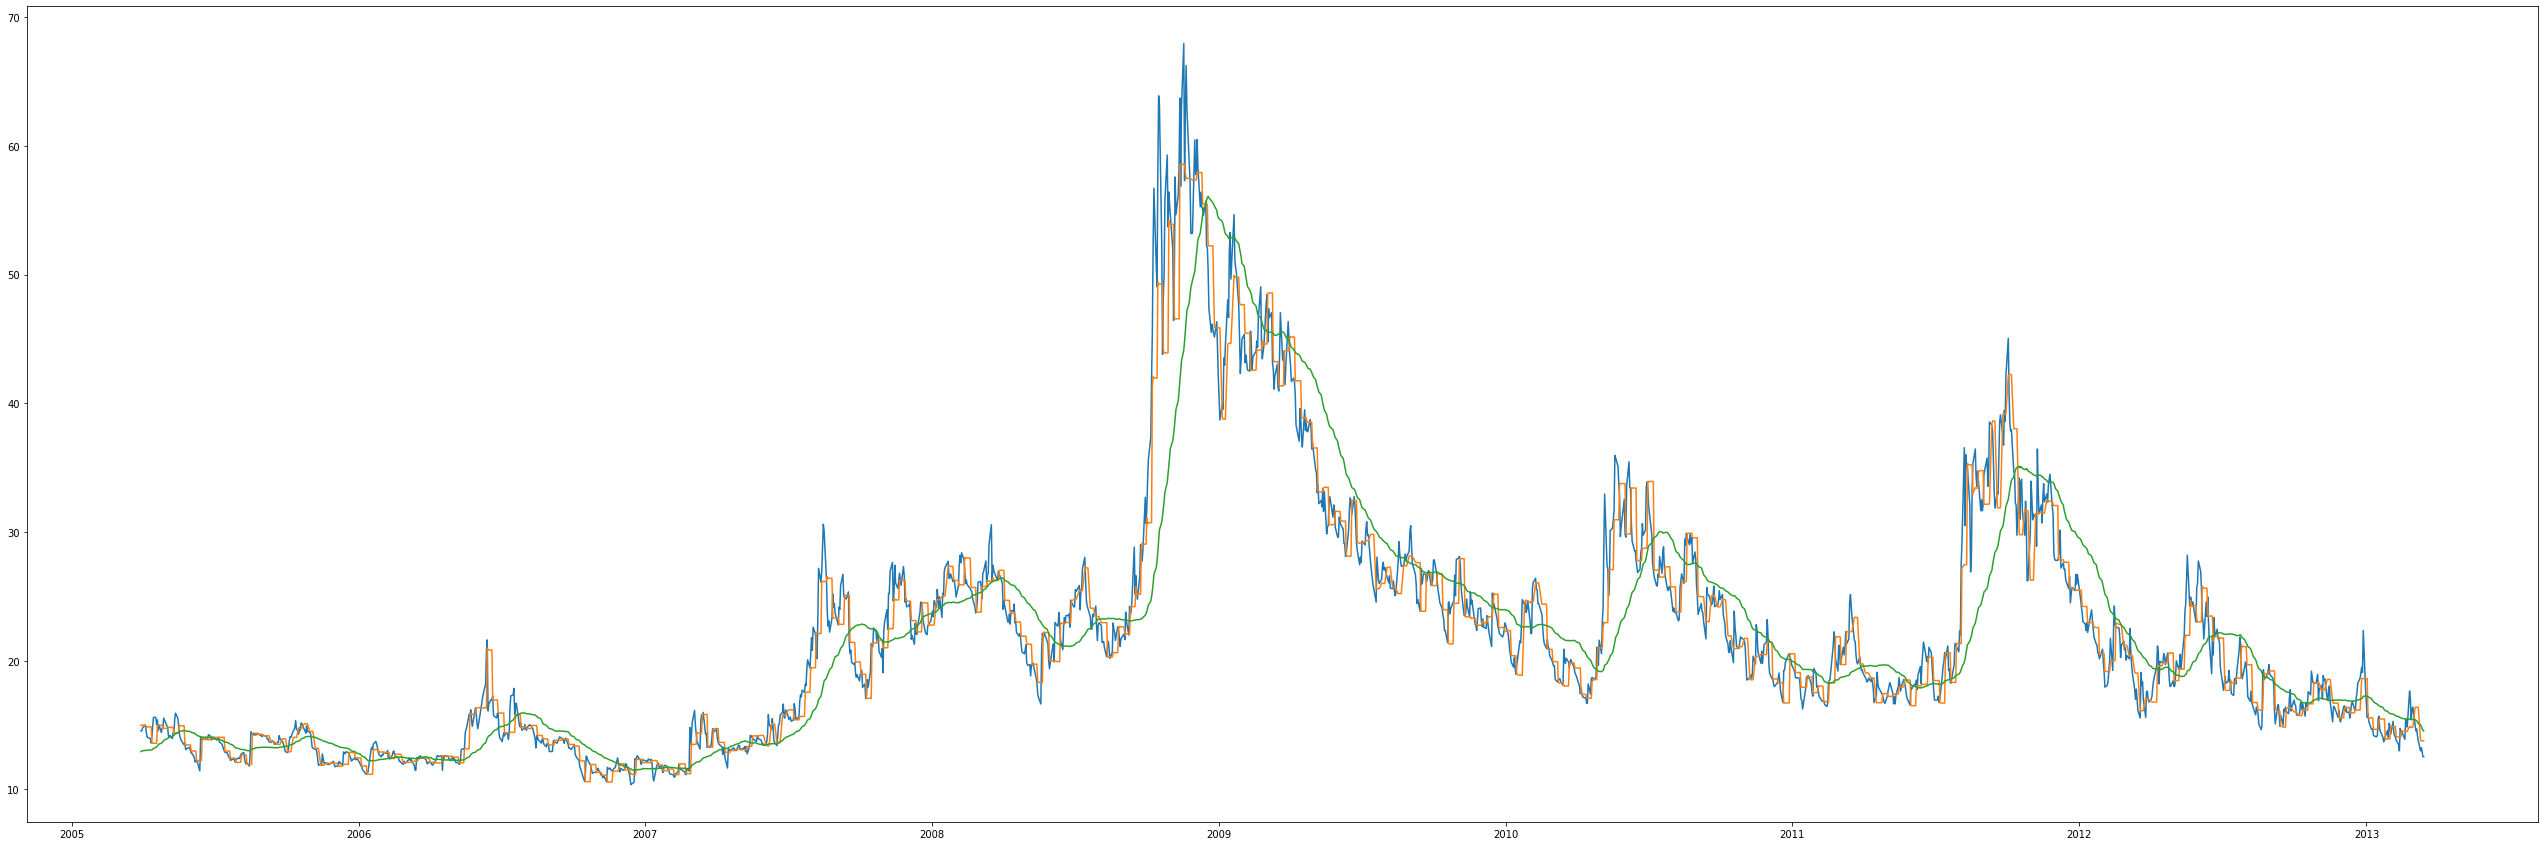

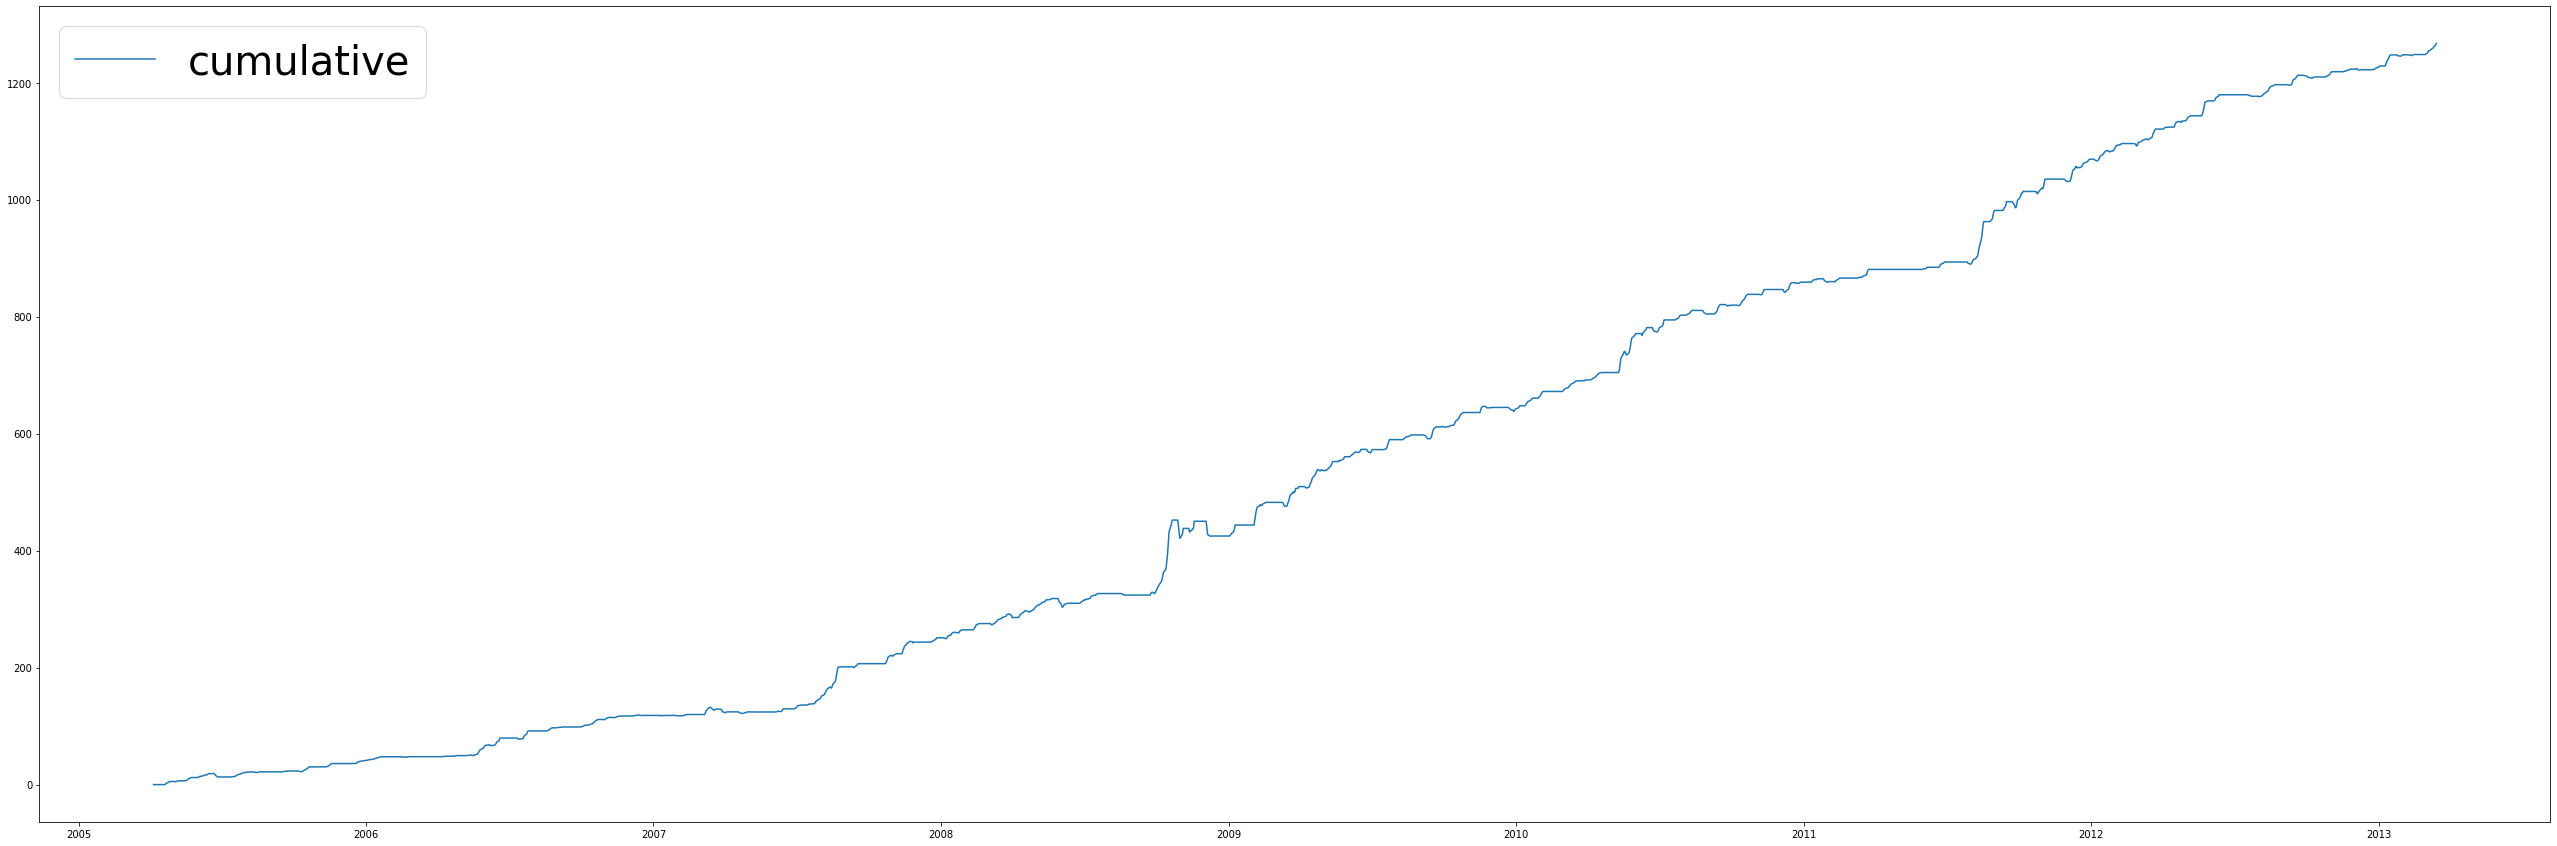

In [20]:
plt.figure(figsize=(45,15))

plt.plot(forcast_df['close'])
plt.plot(forcast_df['pointForecast'])
plt.plot(forcast_df['MA_50'])

plt.show()

plt.figure(figsize=(45,15))

plt.plot(pnl_df['pnl'].cumsum())

plt.legend(['cumulative'],fontsize=40)

plt.show()


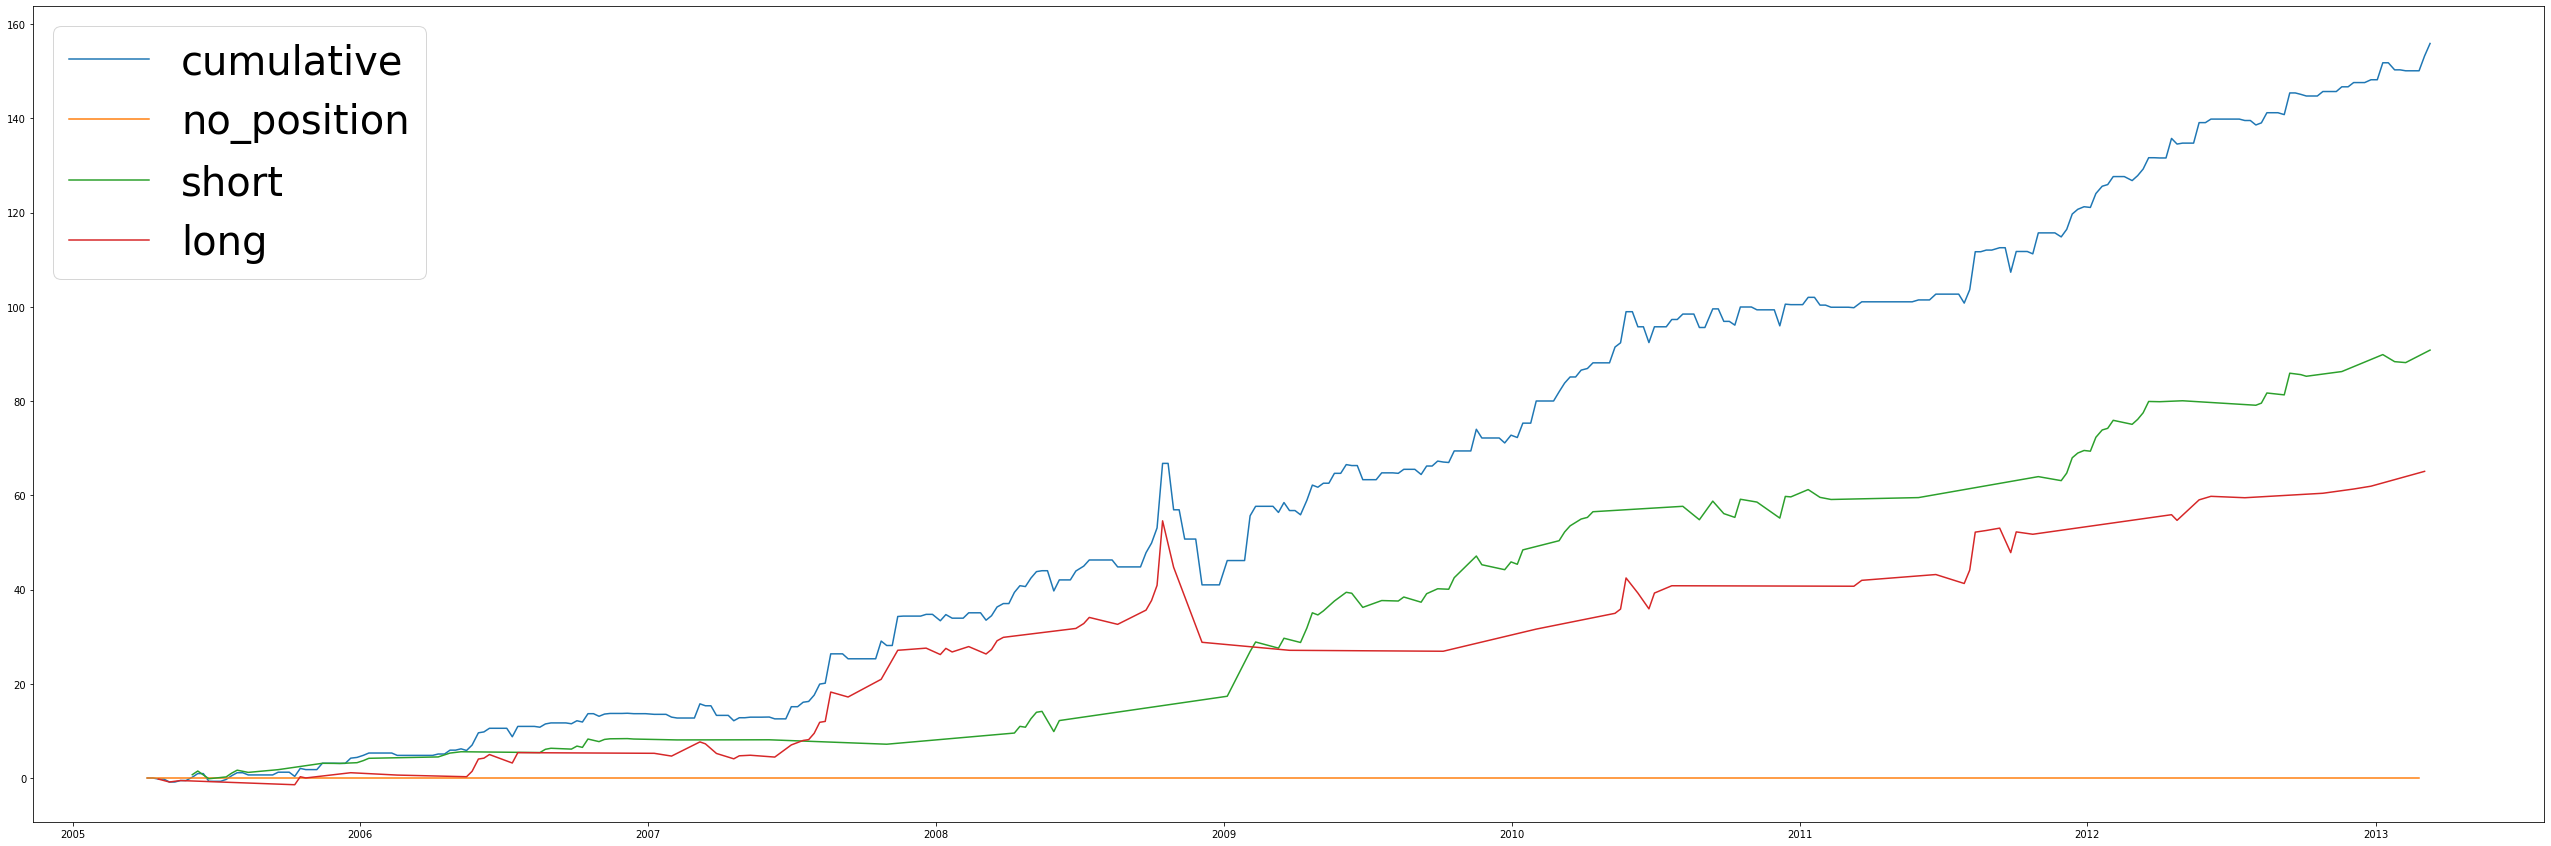

In [21]:
plt.figure(figsize=(45,15))

plt.plot(trade_pnl['pnl'].cumsum())

plt.plot(trade_pnl[trade_pnl['positionType'] == 'no_position']['pnl'].cumsum())
plt.plot(trade_pnl[trade_pnl['positionType'] == 'short']['pnl'].cumsum())
plt.plot(trade_pnl[trade_pnl['positionType'] == 'long']['pnl'].cumsum())

plt.legend(['cumulative','no_position','short','long'],fontsize=40)

plt.show()


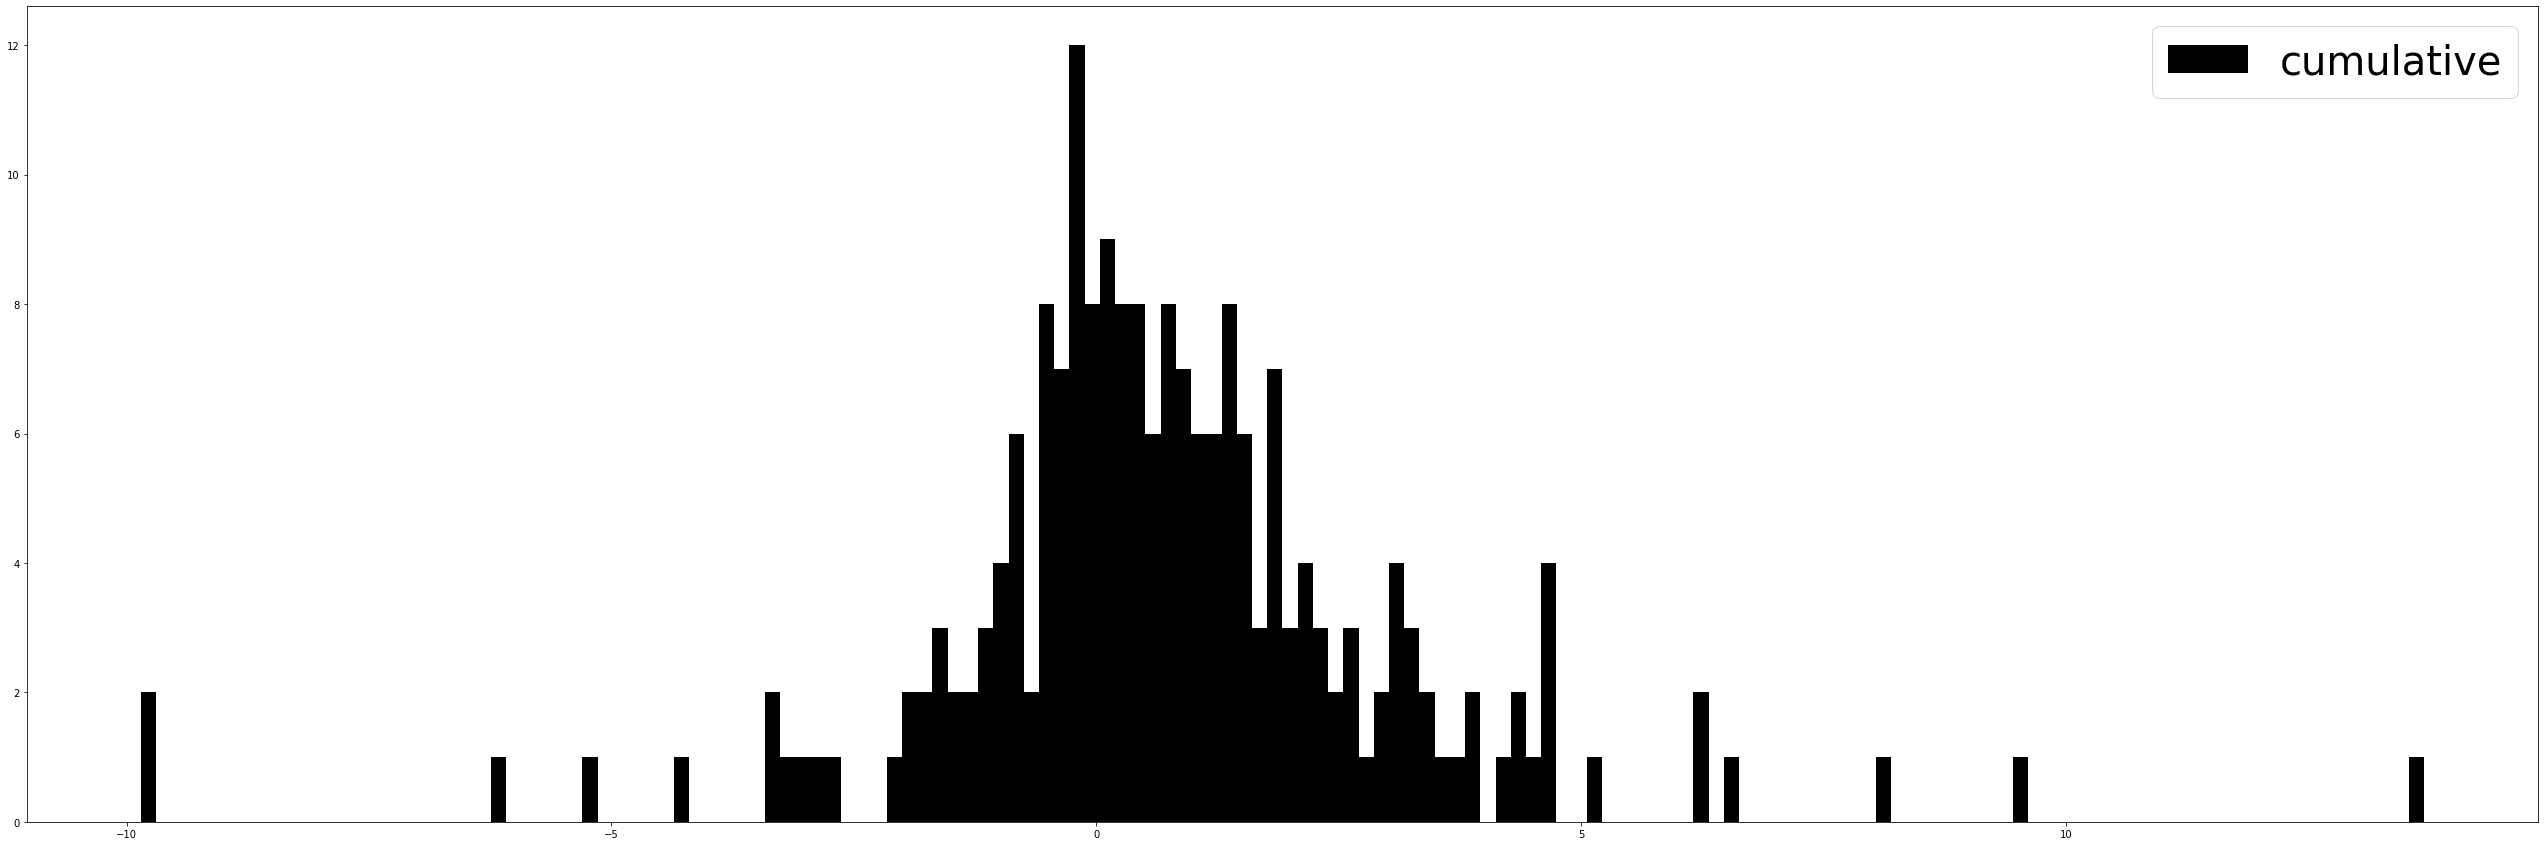

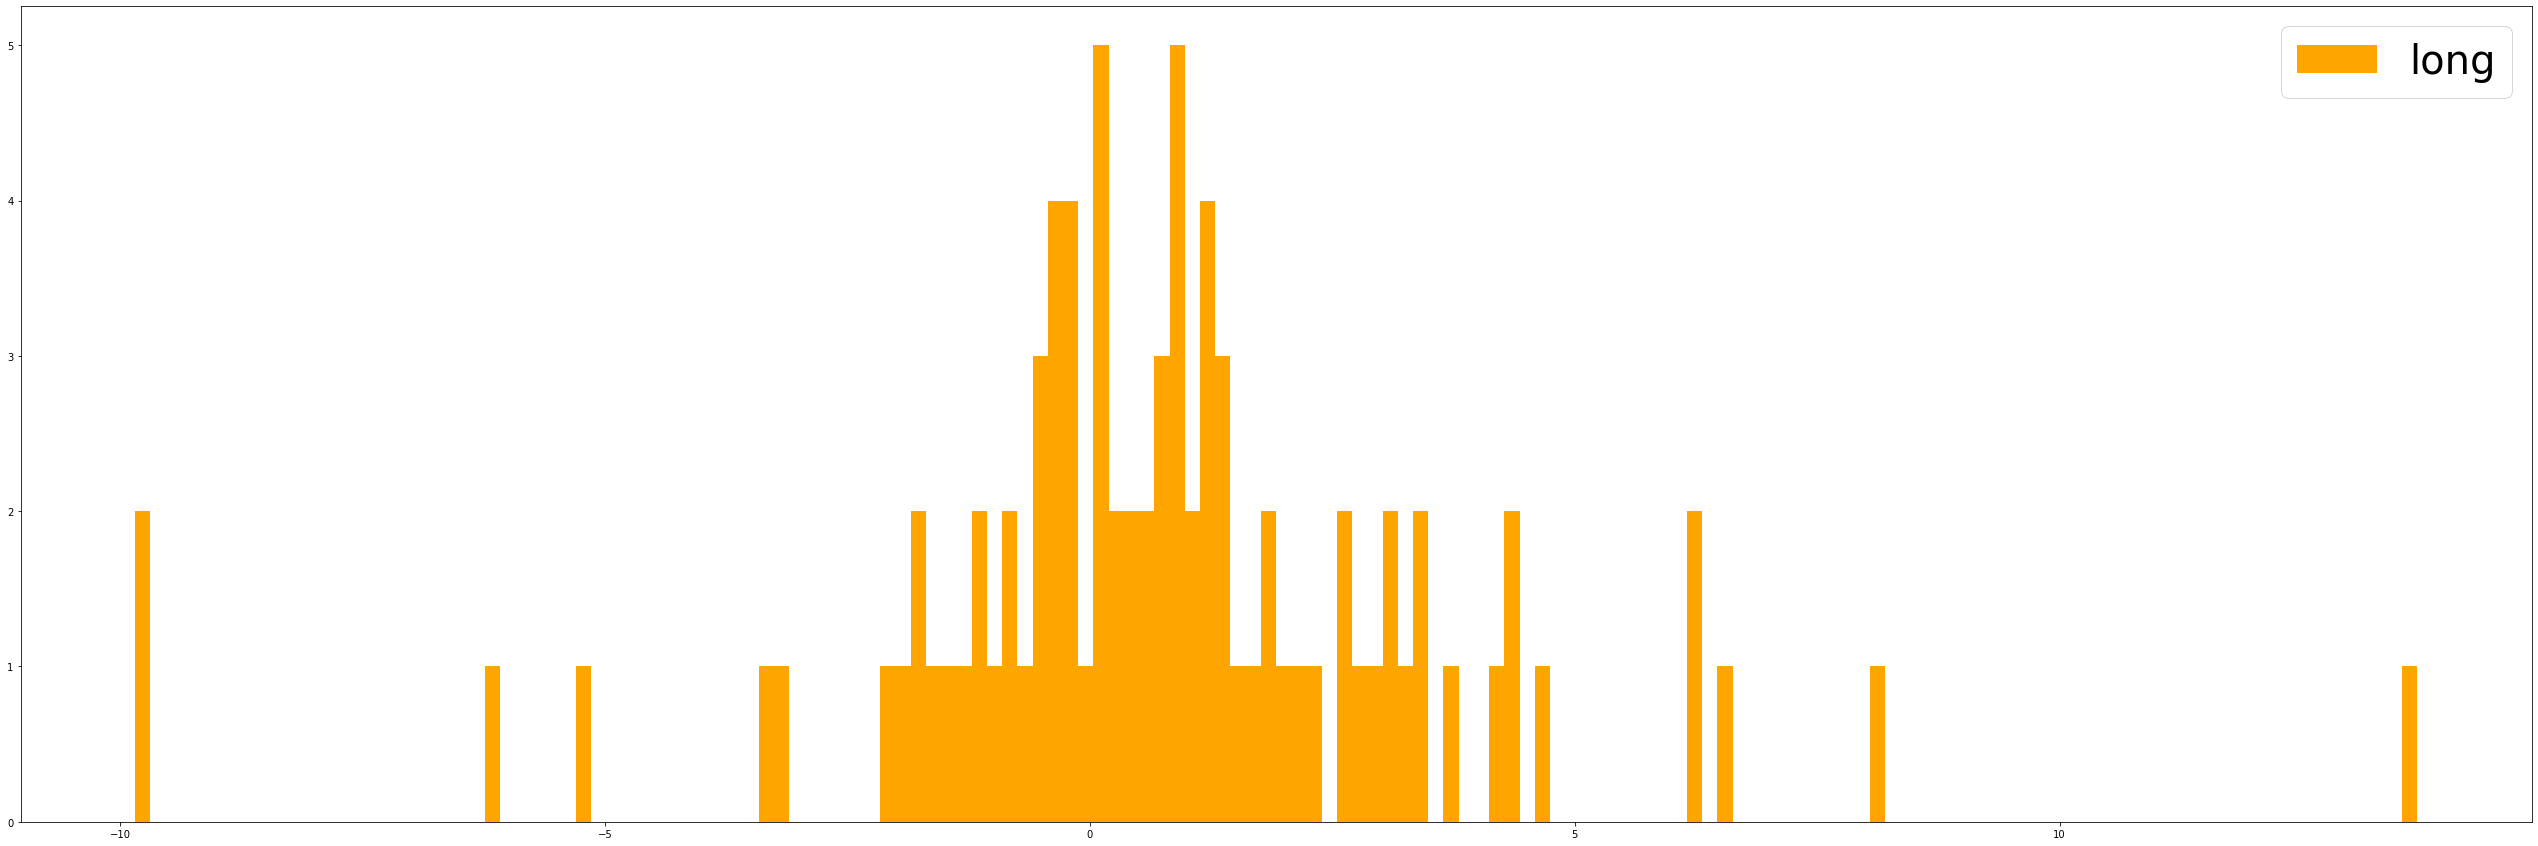

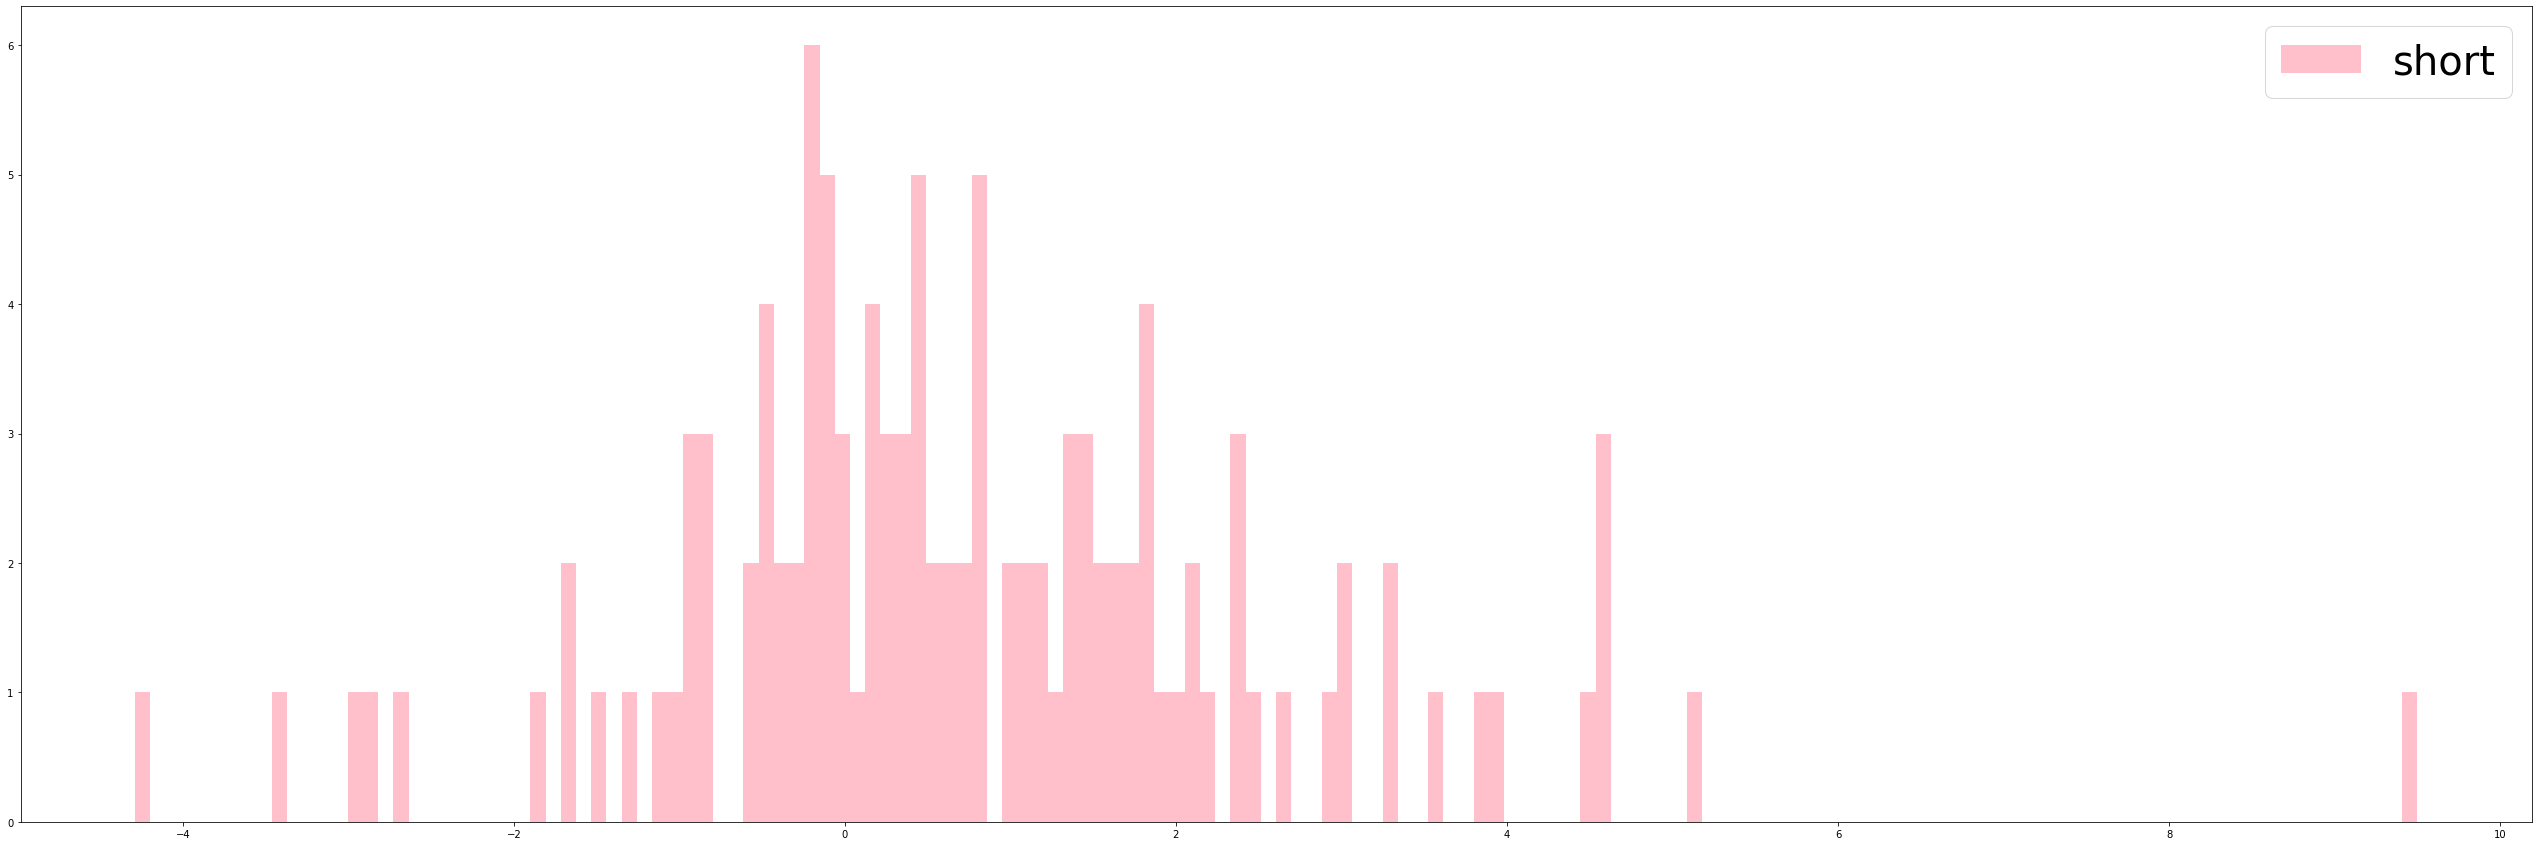

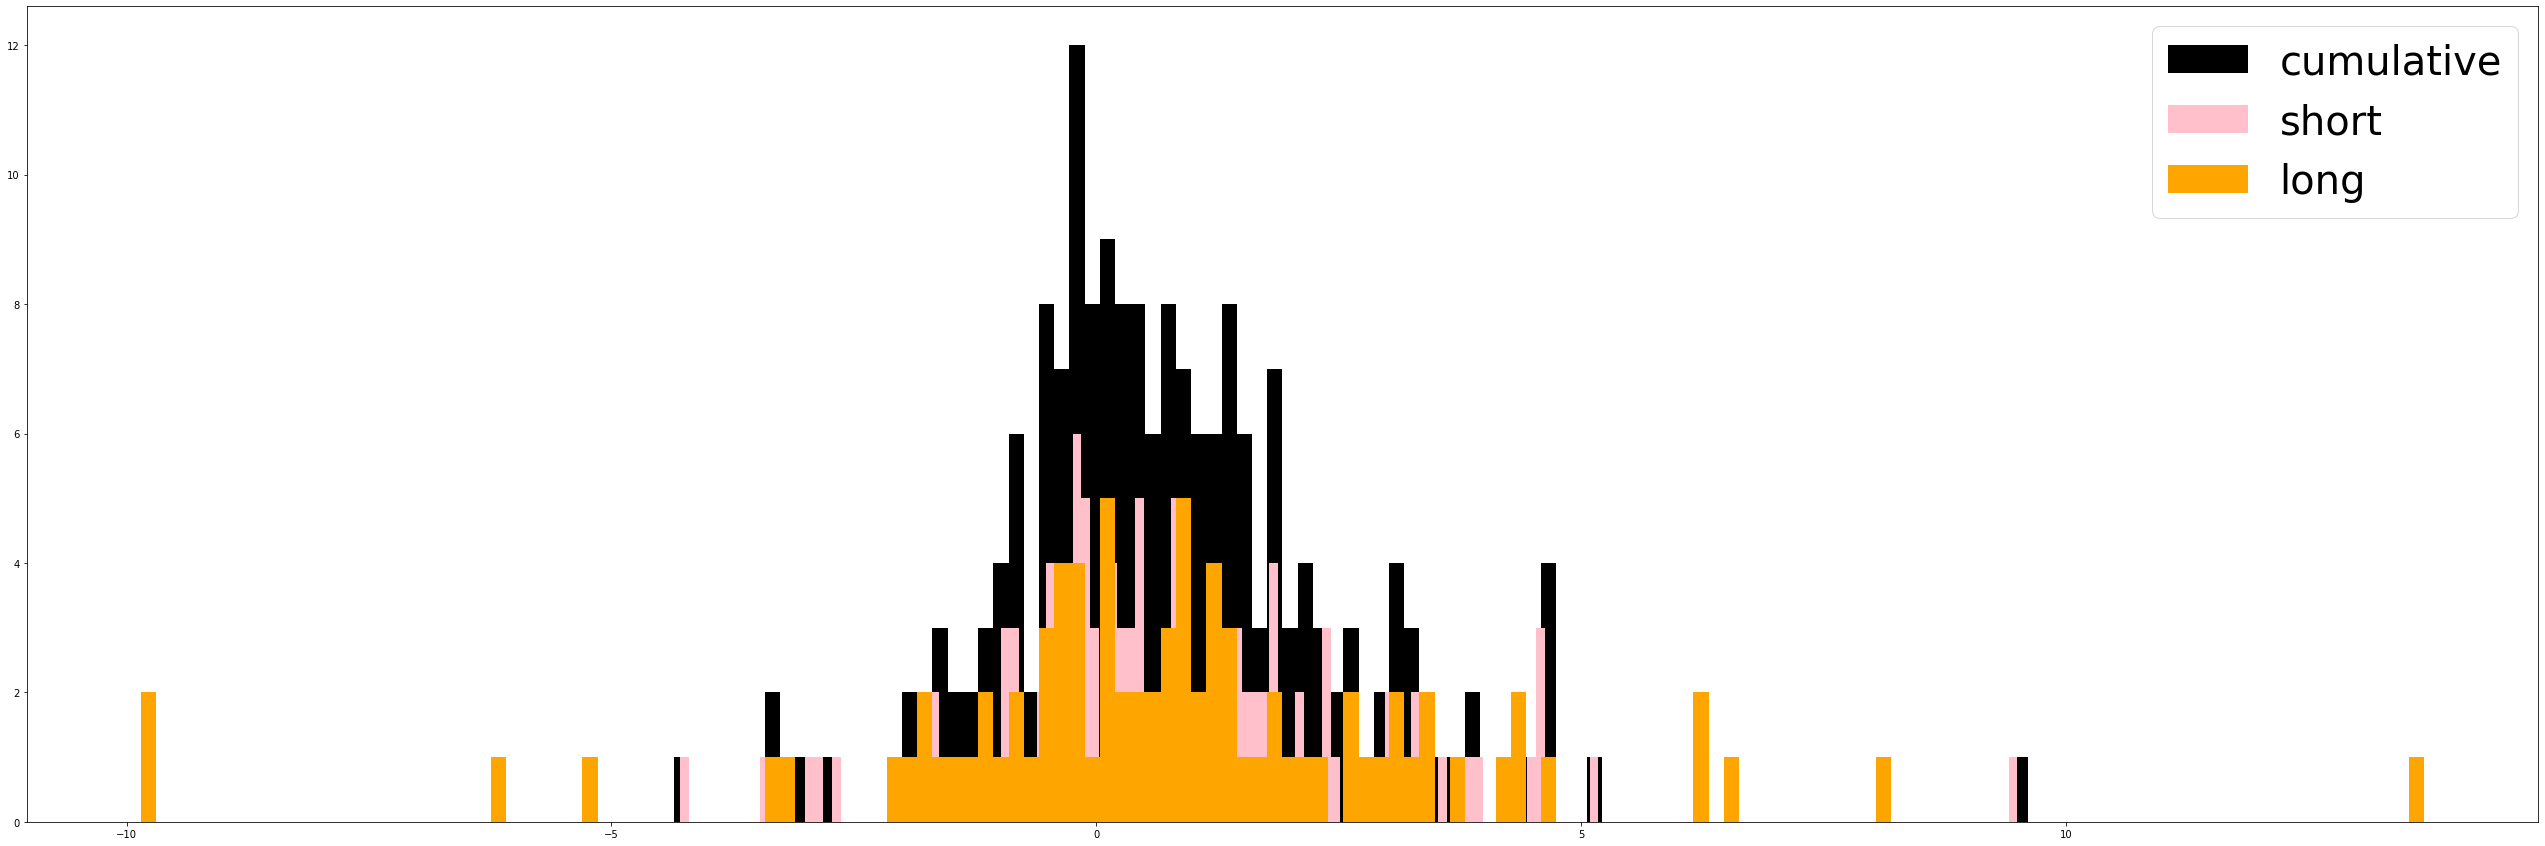

In [25]:
# Cumulative
plt.figure(figsize=(45,15))

plt.hist(trade_pnl[trade_pnl['pnl'] != 0]['pnl'],color='black',bins=150)

plt.legend(['cumulative'],fontsize=40)

plt.show()

# Short
plt.figure(figsize=(45,15))

plt.hist(trade_pnl[trade_pnl['positionType'] == 'long']['pnl'],color='orange',bins=150)

plt.legend(['long'],fontsize=40)

plt.show()

# Long
plt.figure(figsize=(45,15))

plt.hist(trade_pnl[trade_pnl['positionType'] == 'short']['pnl'],color='pink',bins=150)

plt.legend(['short'],fontsize=40)

plt.show()

# Compare all
plt.figure(figsize=(45,15))
plt.hist(trade_pnl[trade_pnl['pnl'] != 0]['pnl'],color='black',bins=150)

plt.hist(trade_pnl[trade_pnl['positionType'] == 'short']['pnl'],color='pink',bins=150)
plt.hist(trade_pnl[trade_pnl['positionType'] == 'long']['pnl'],color='orange',bins=150)

plt.legend(['cumulative','short','long'],fontsize=40)

plt.show()

# Pnl vs. Price

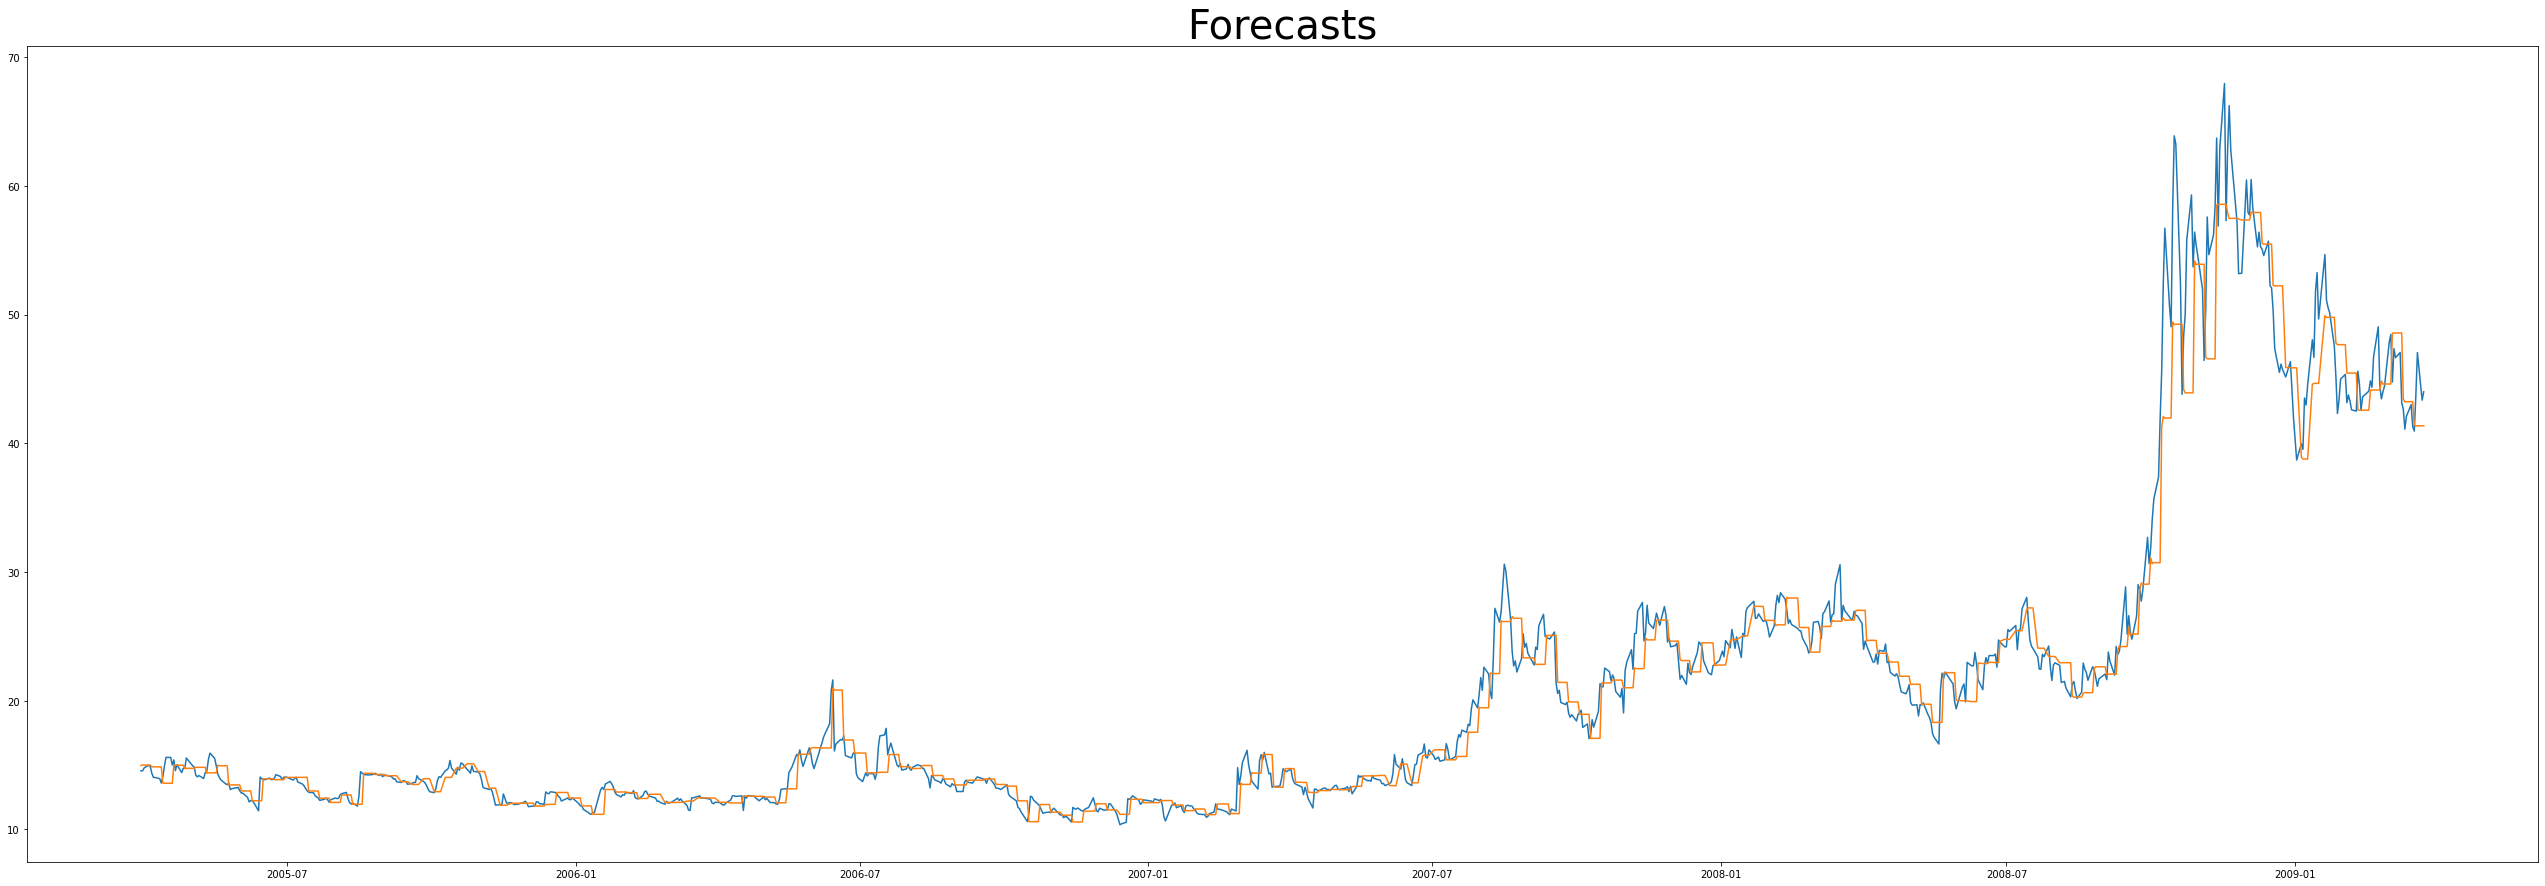

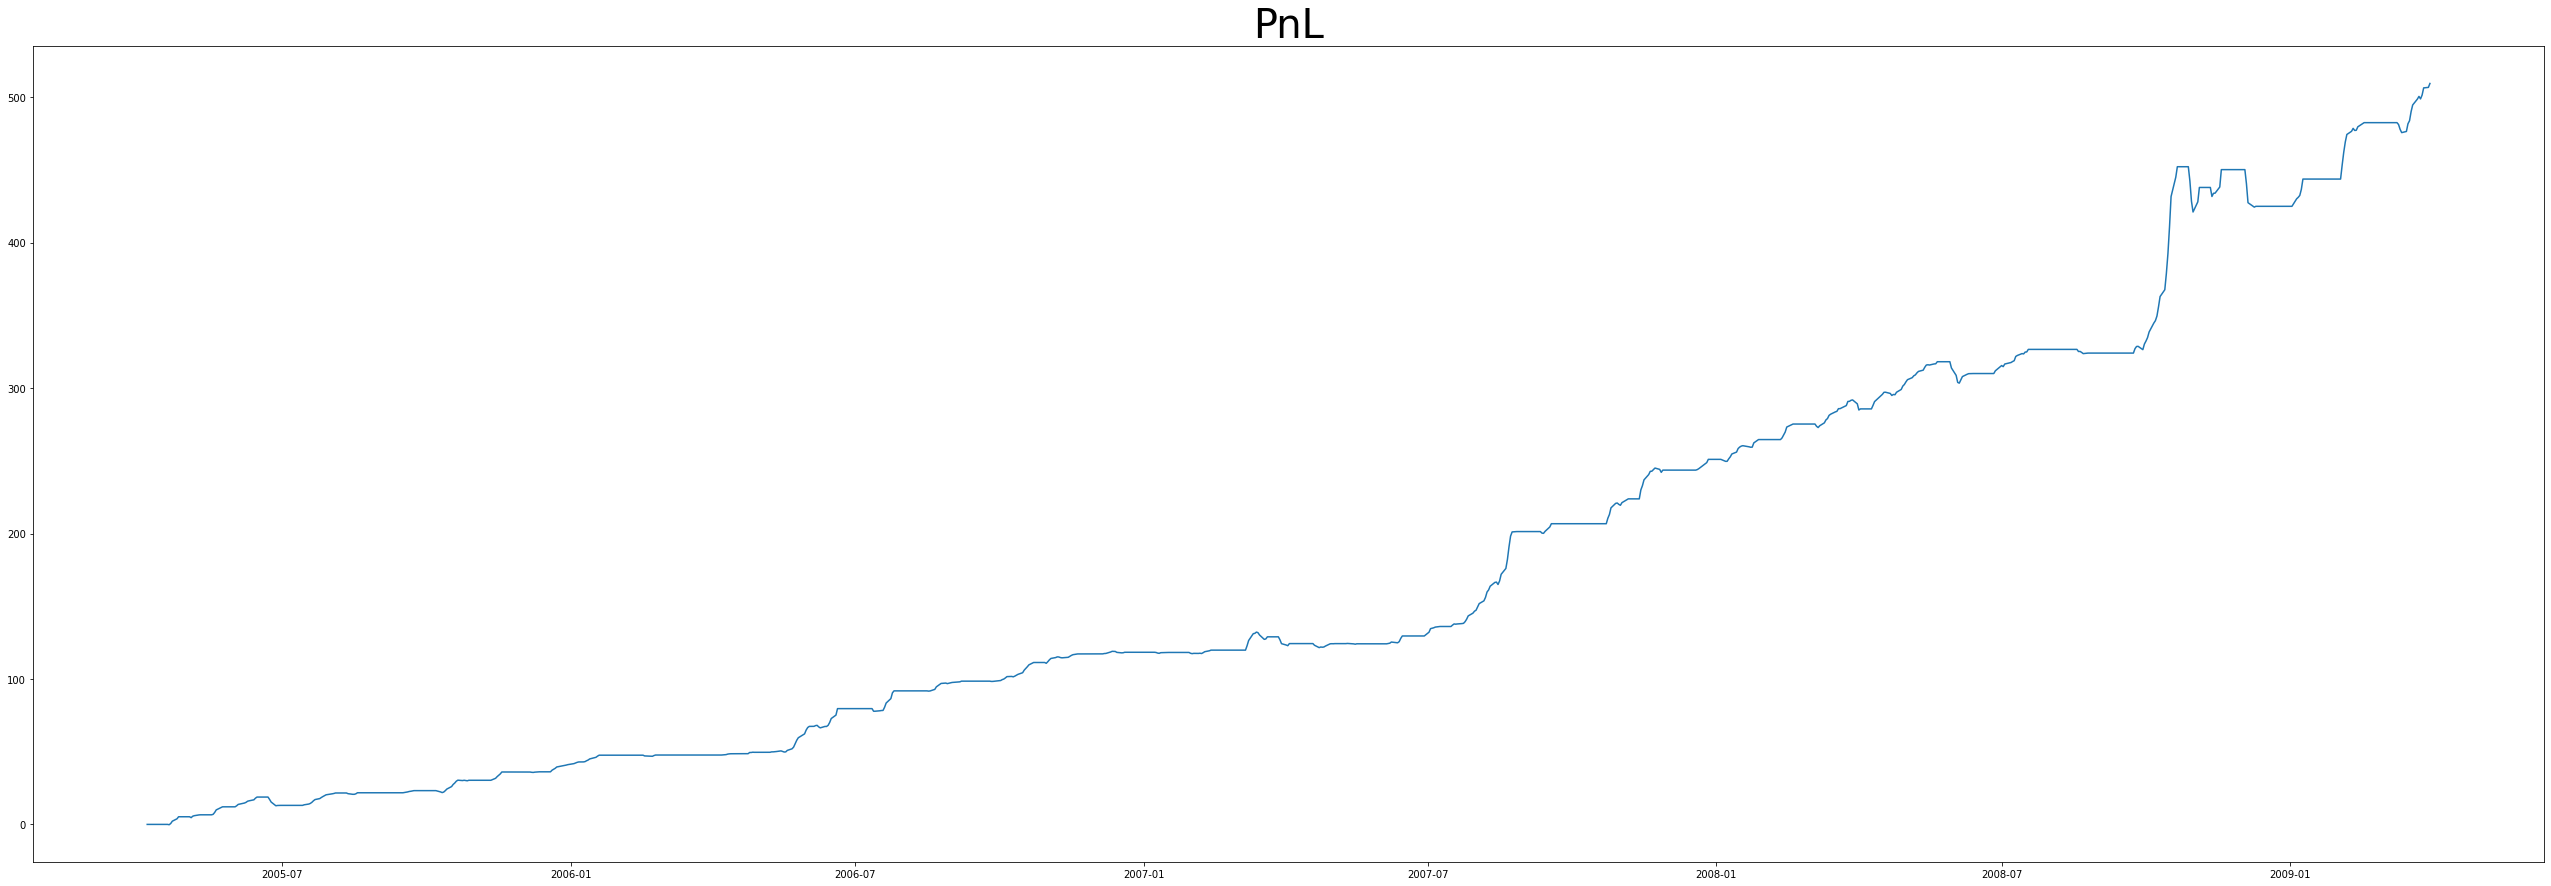

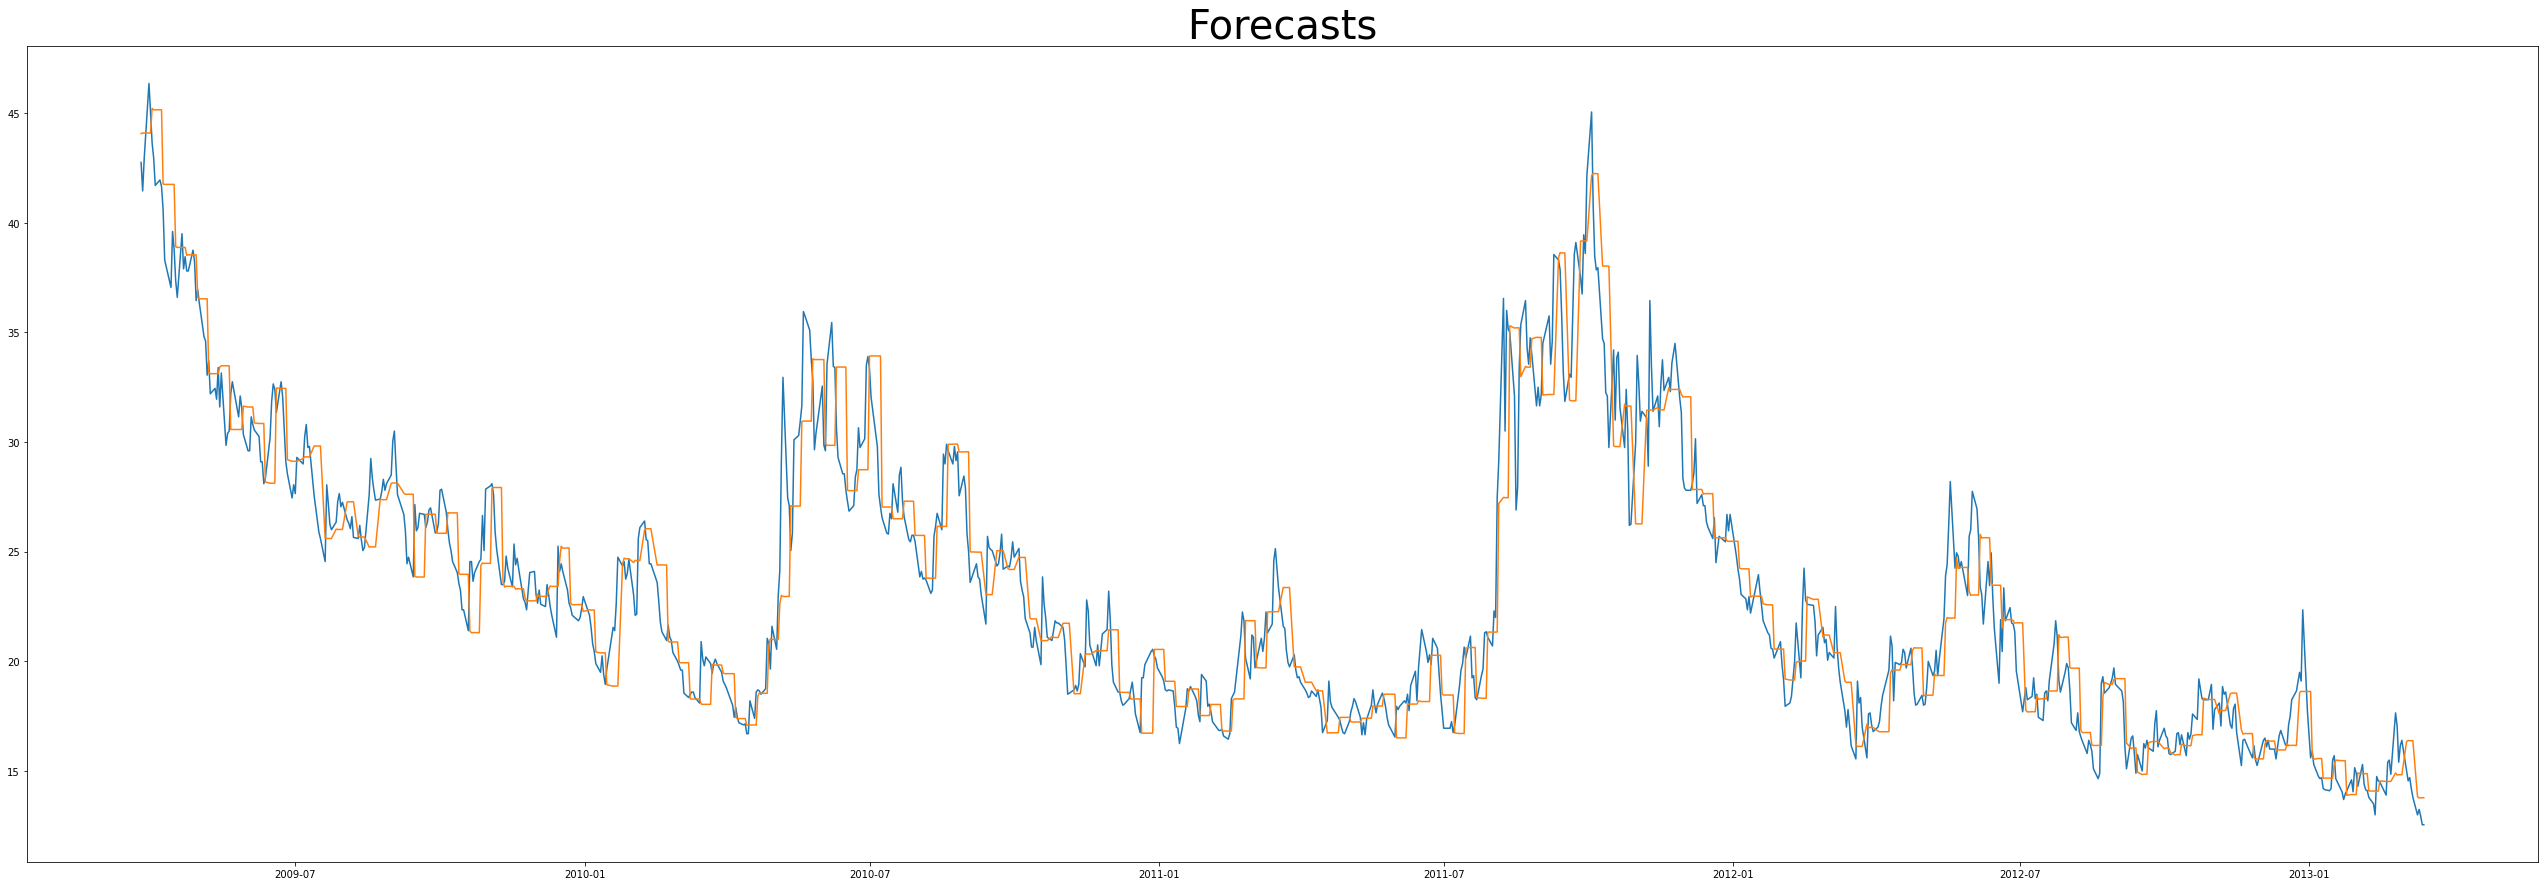

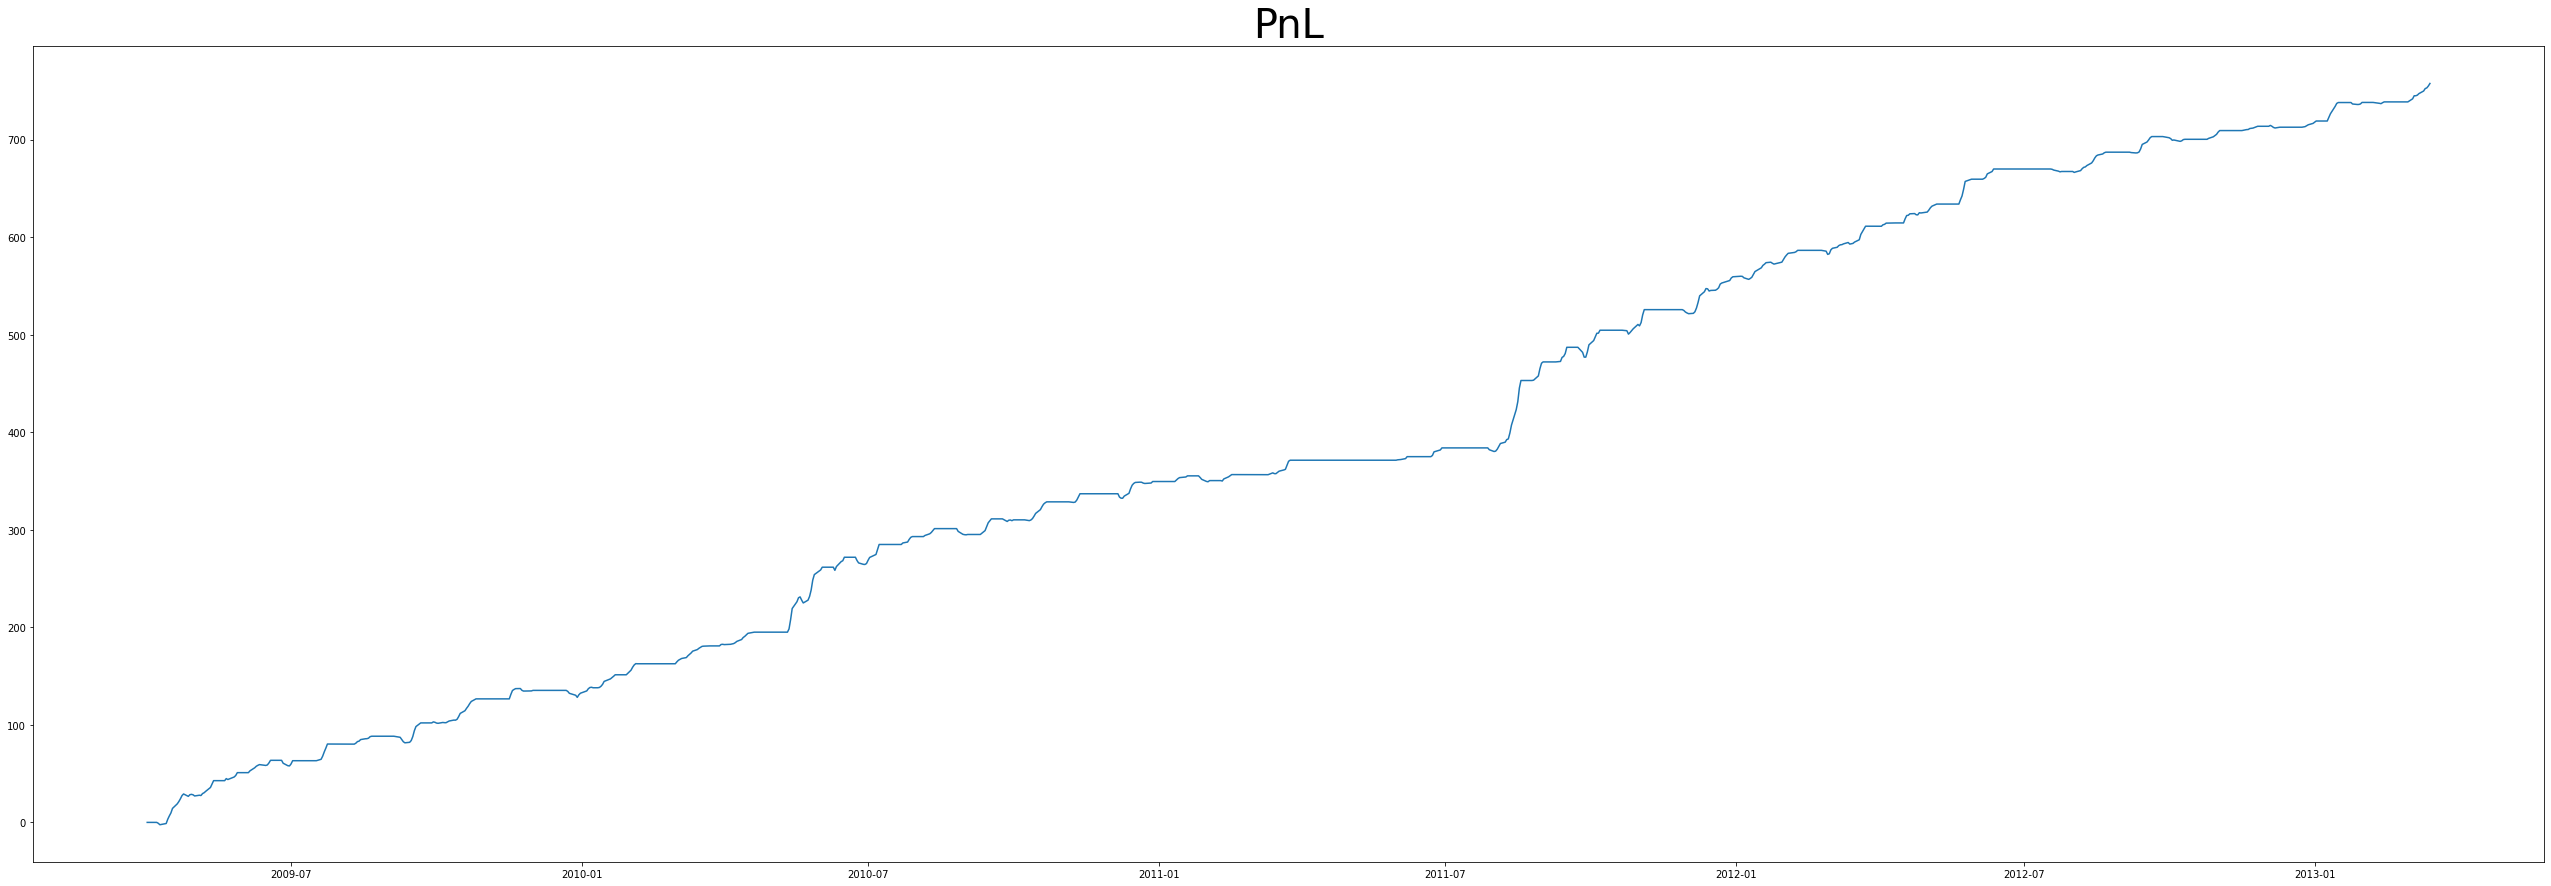

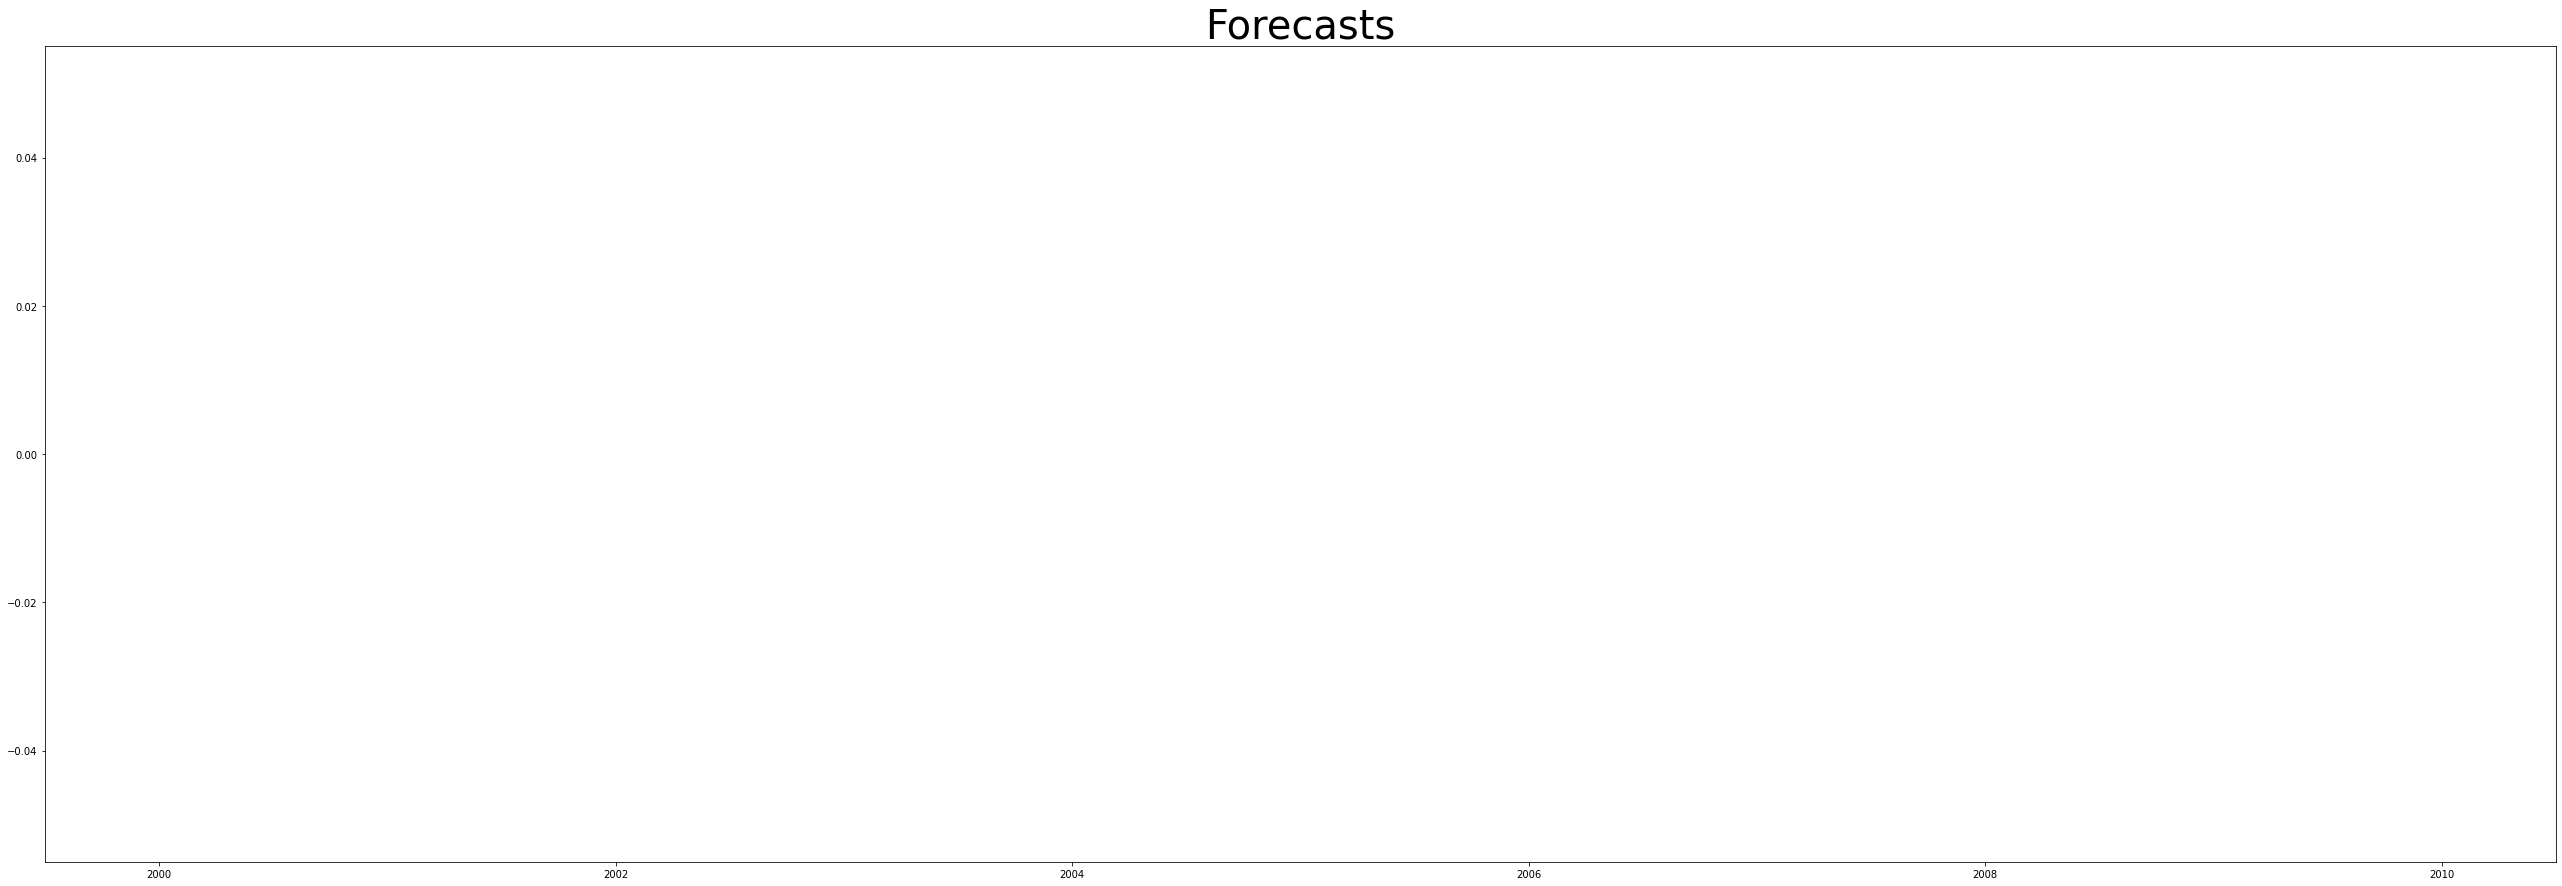

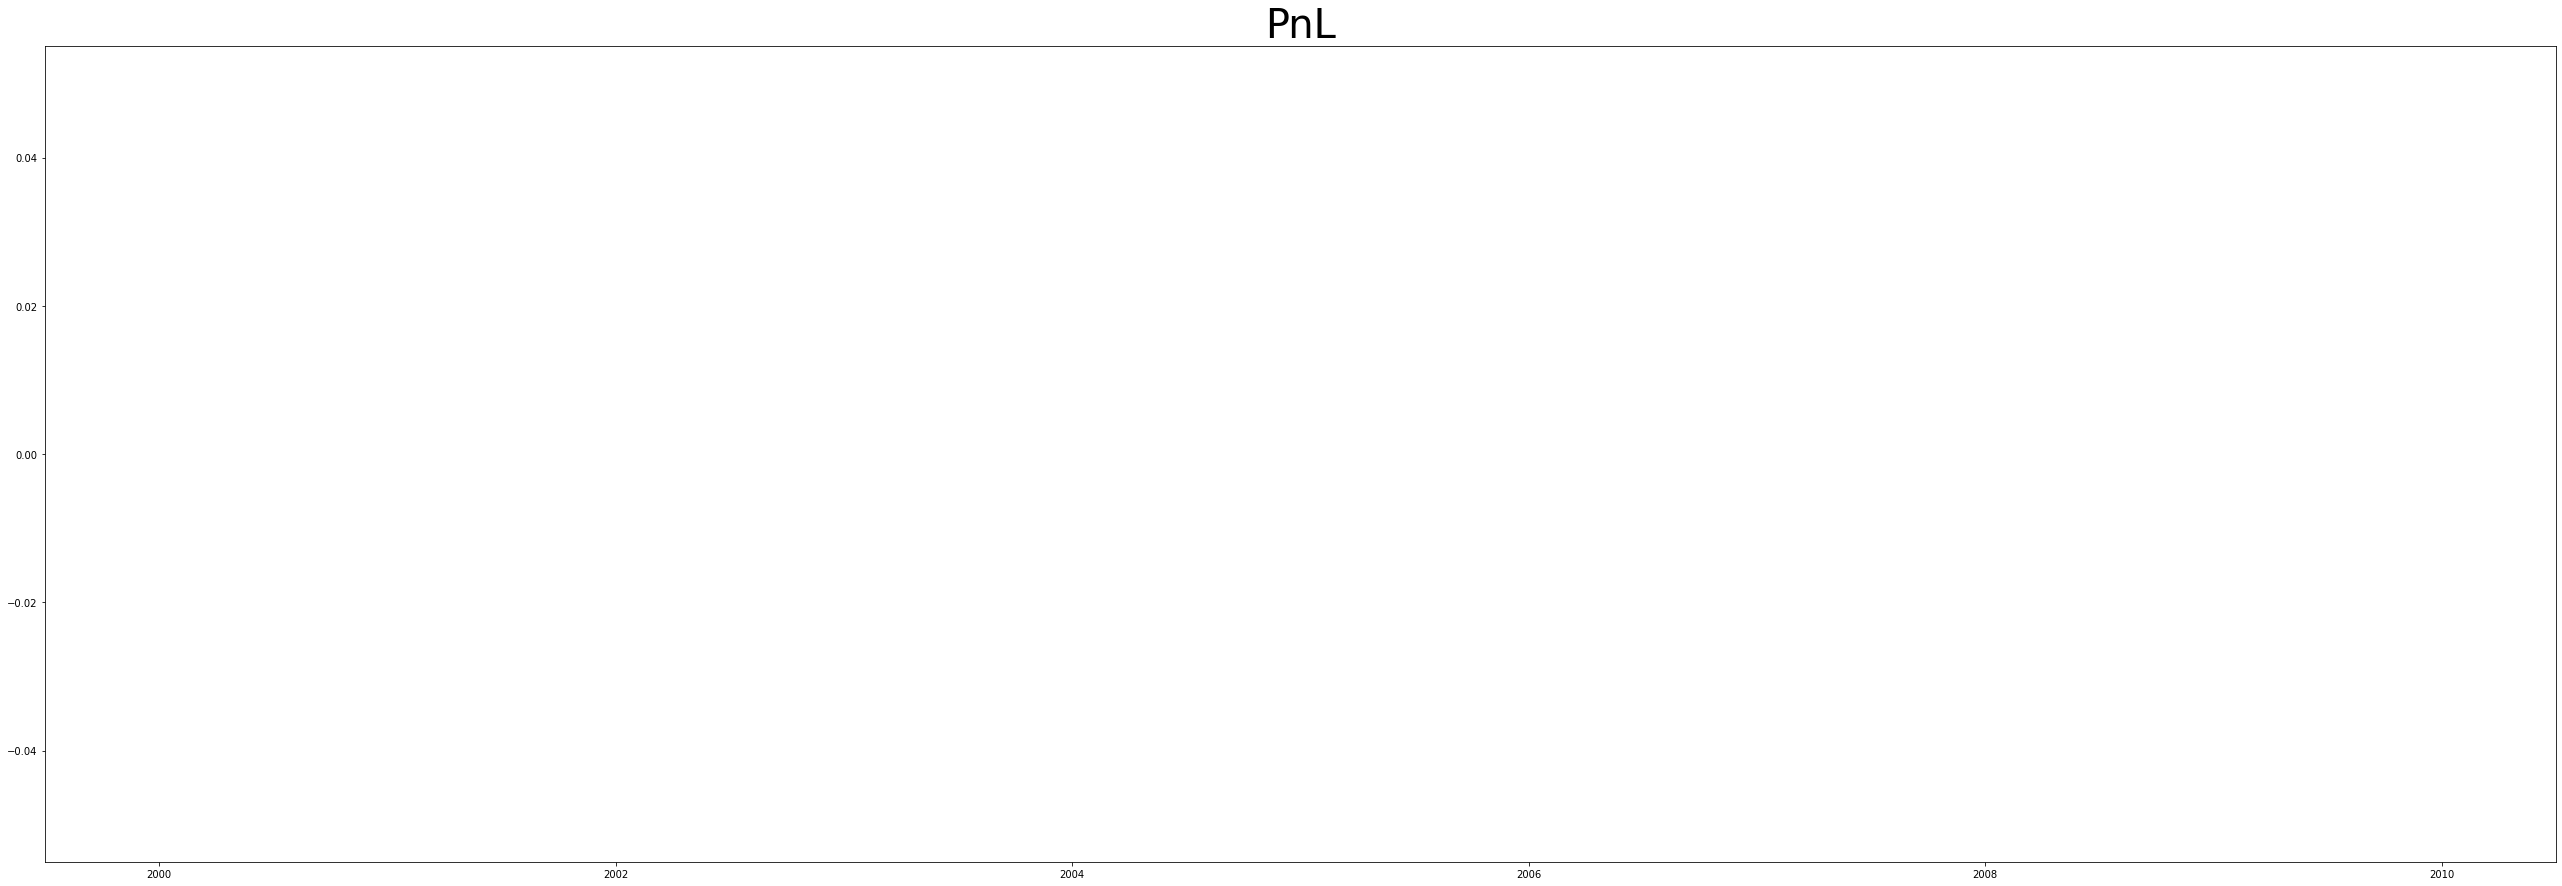

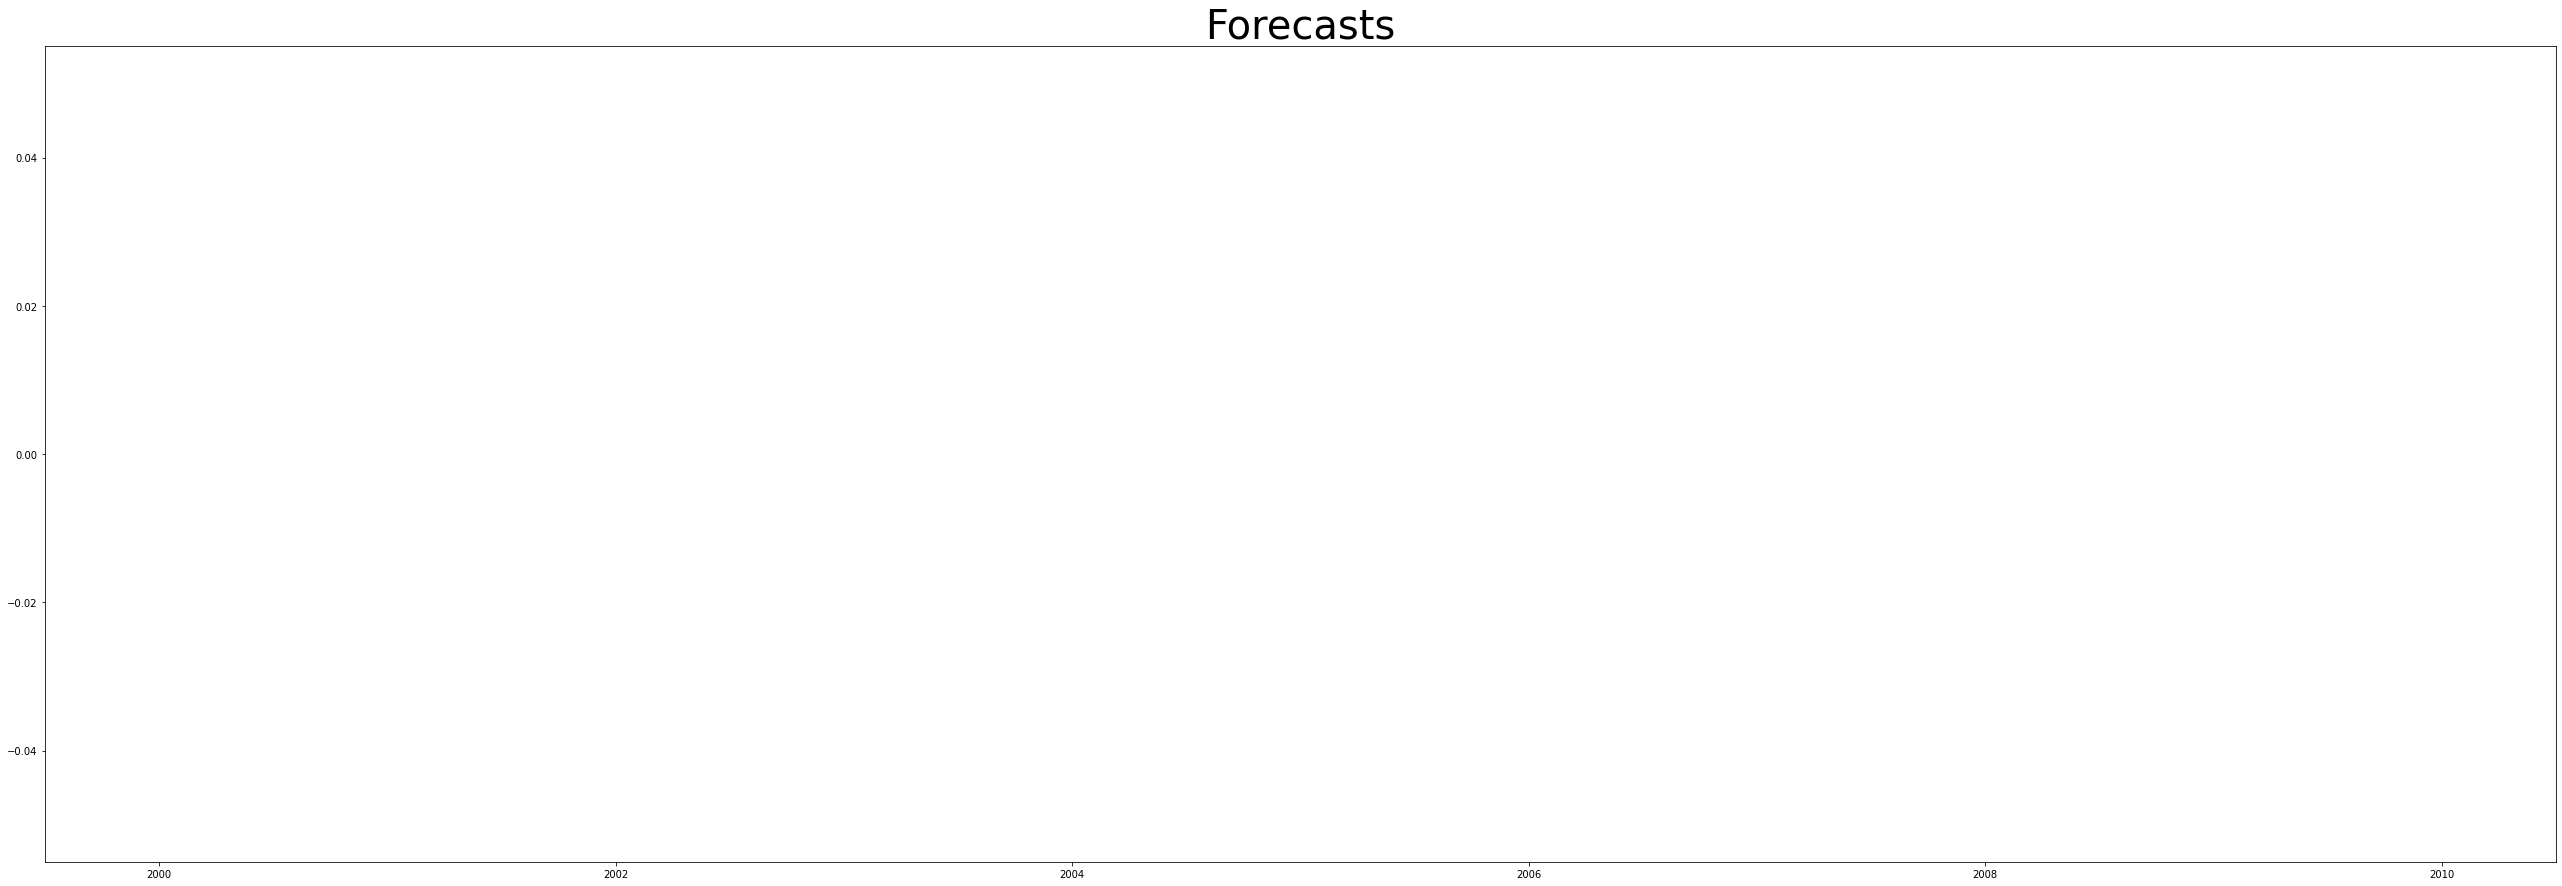

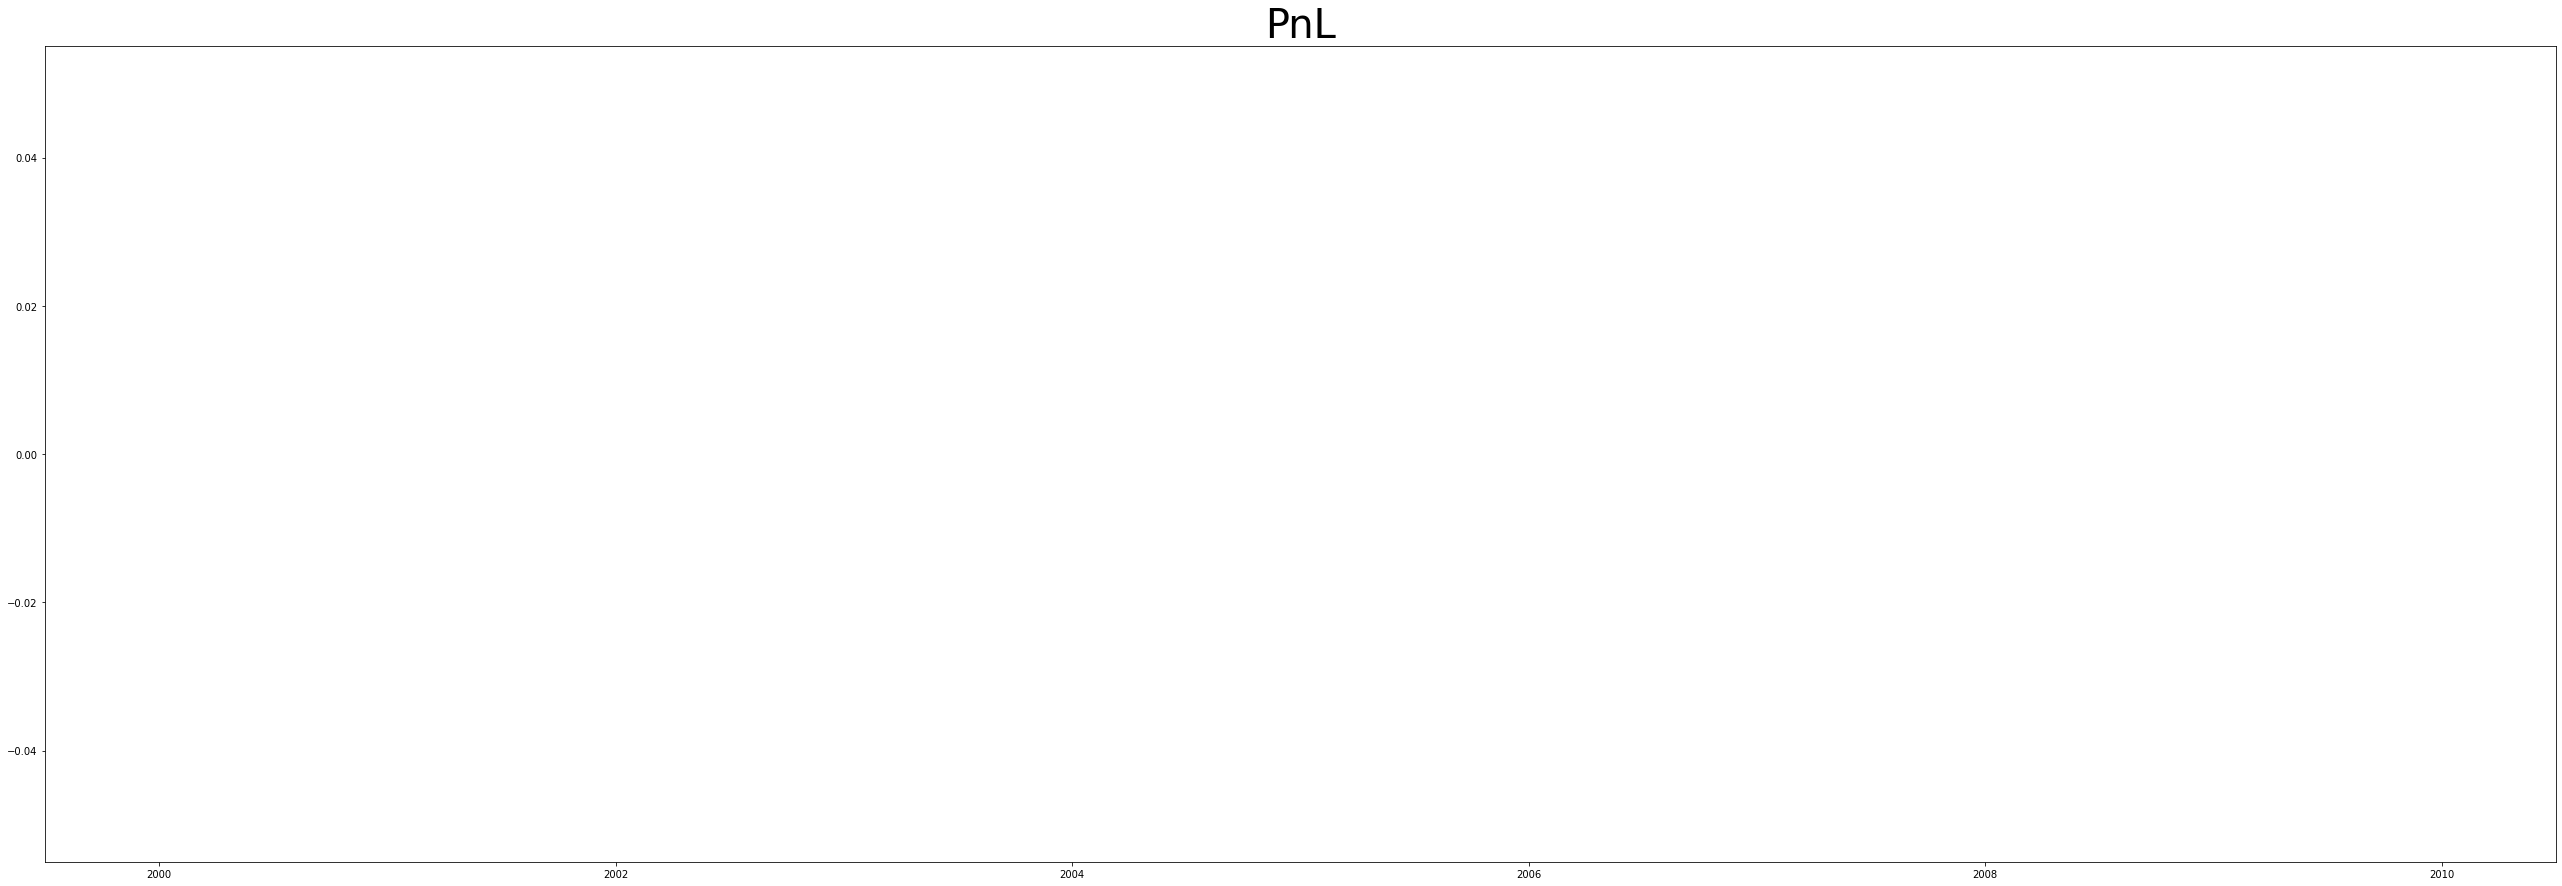

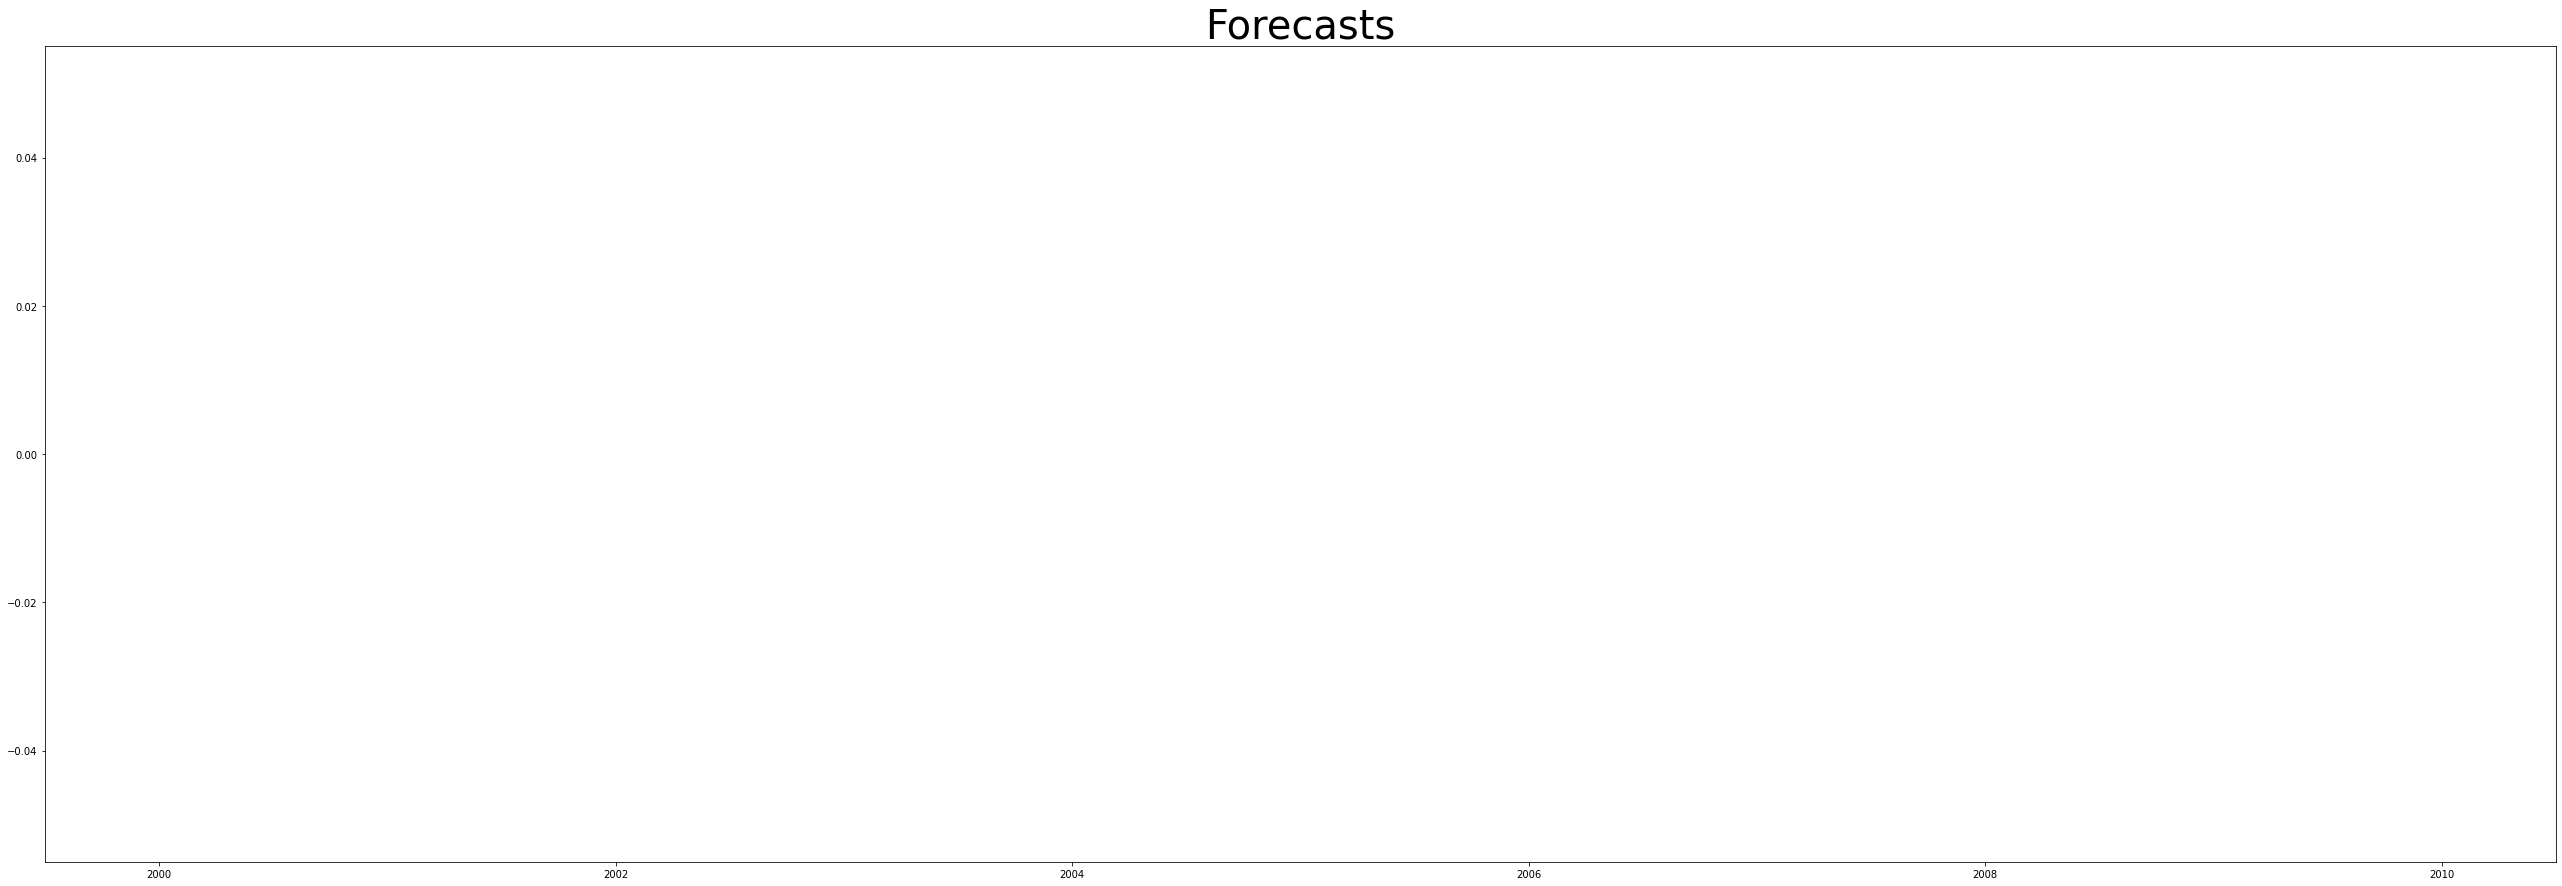

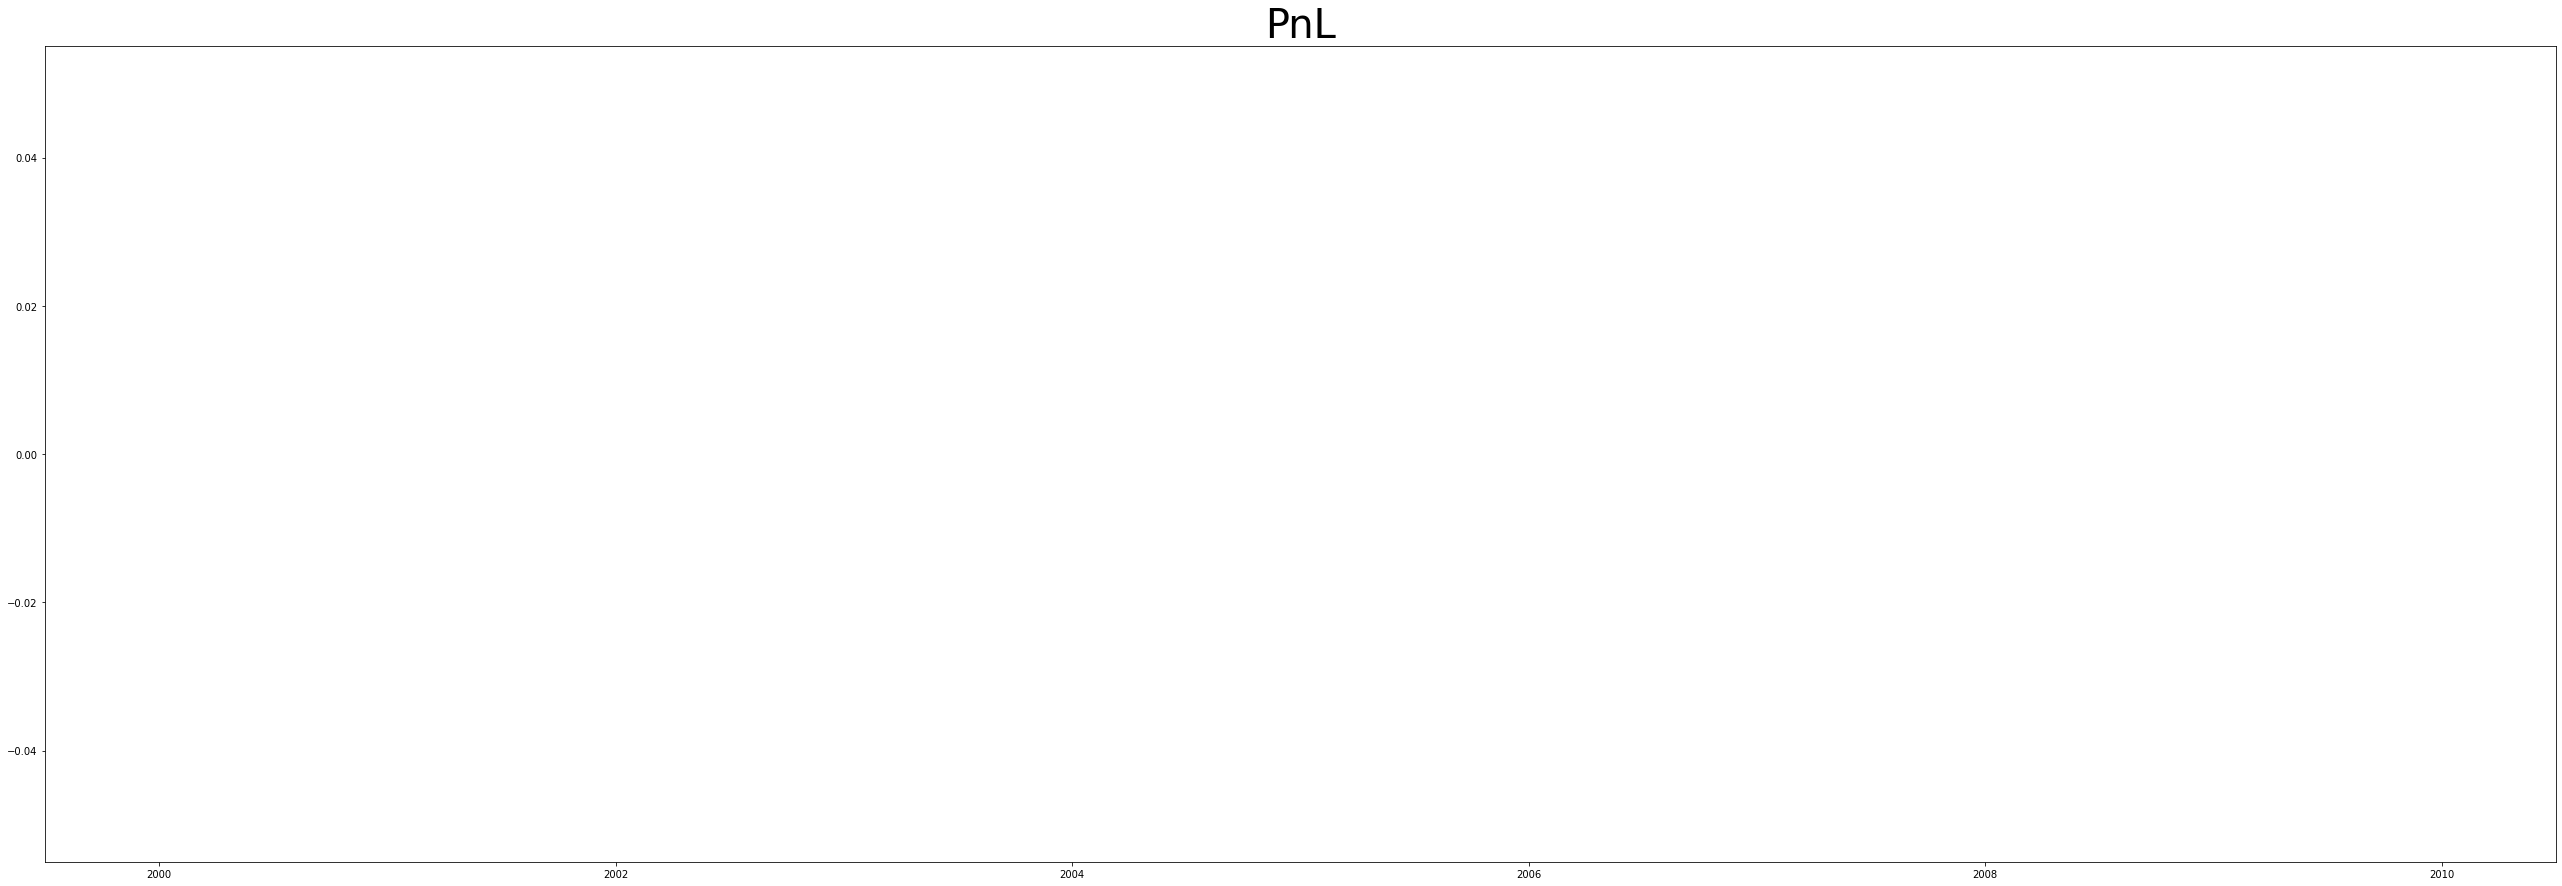

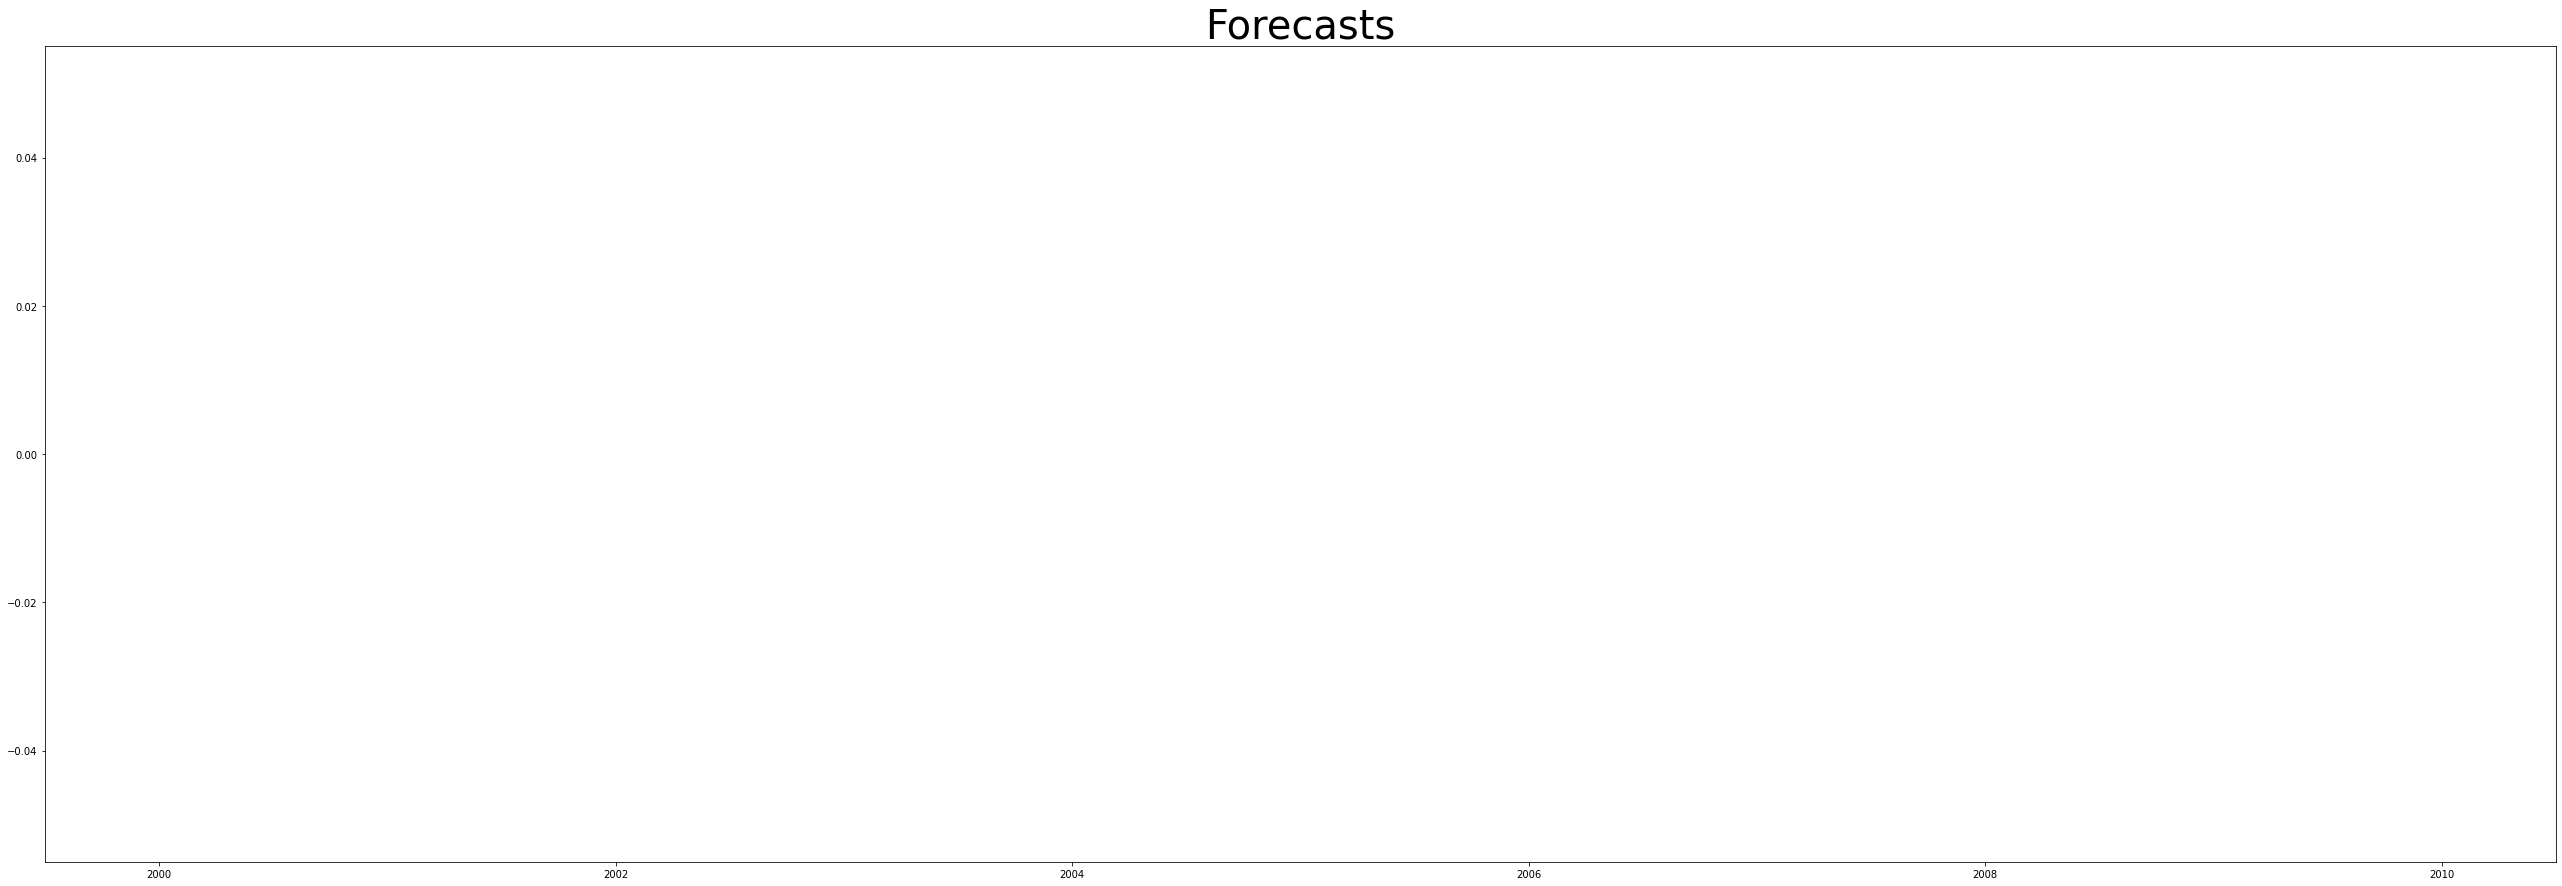

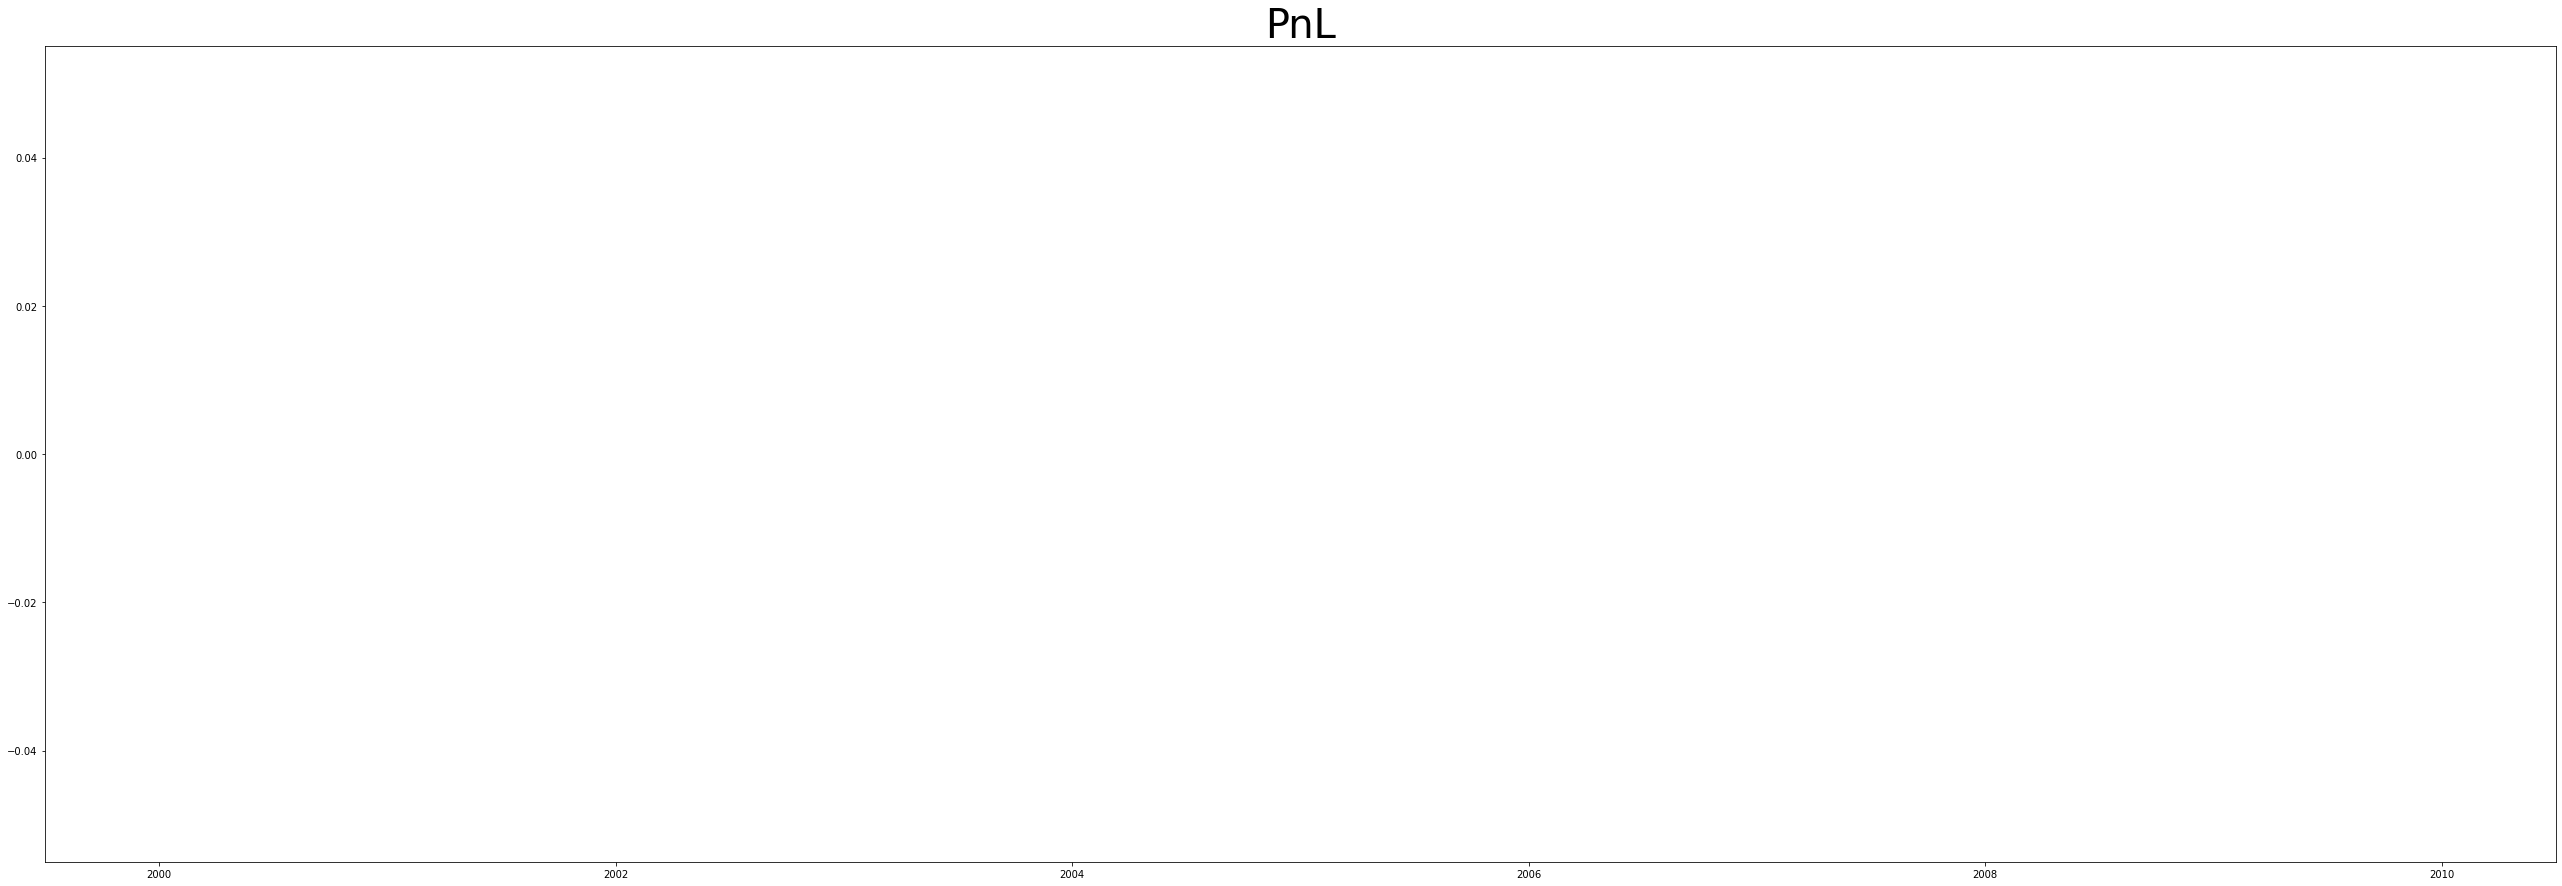

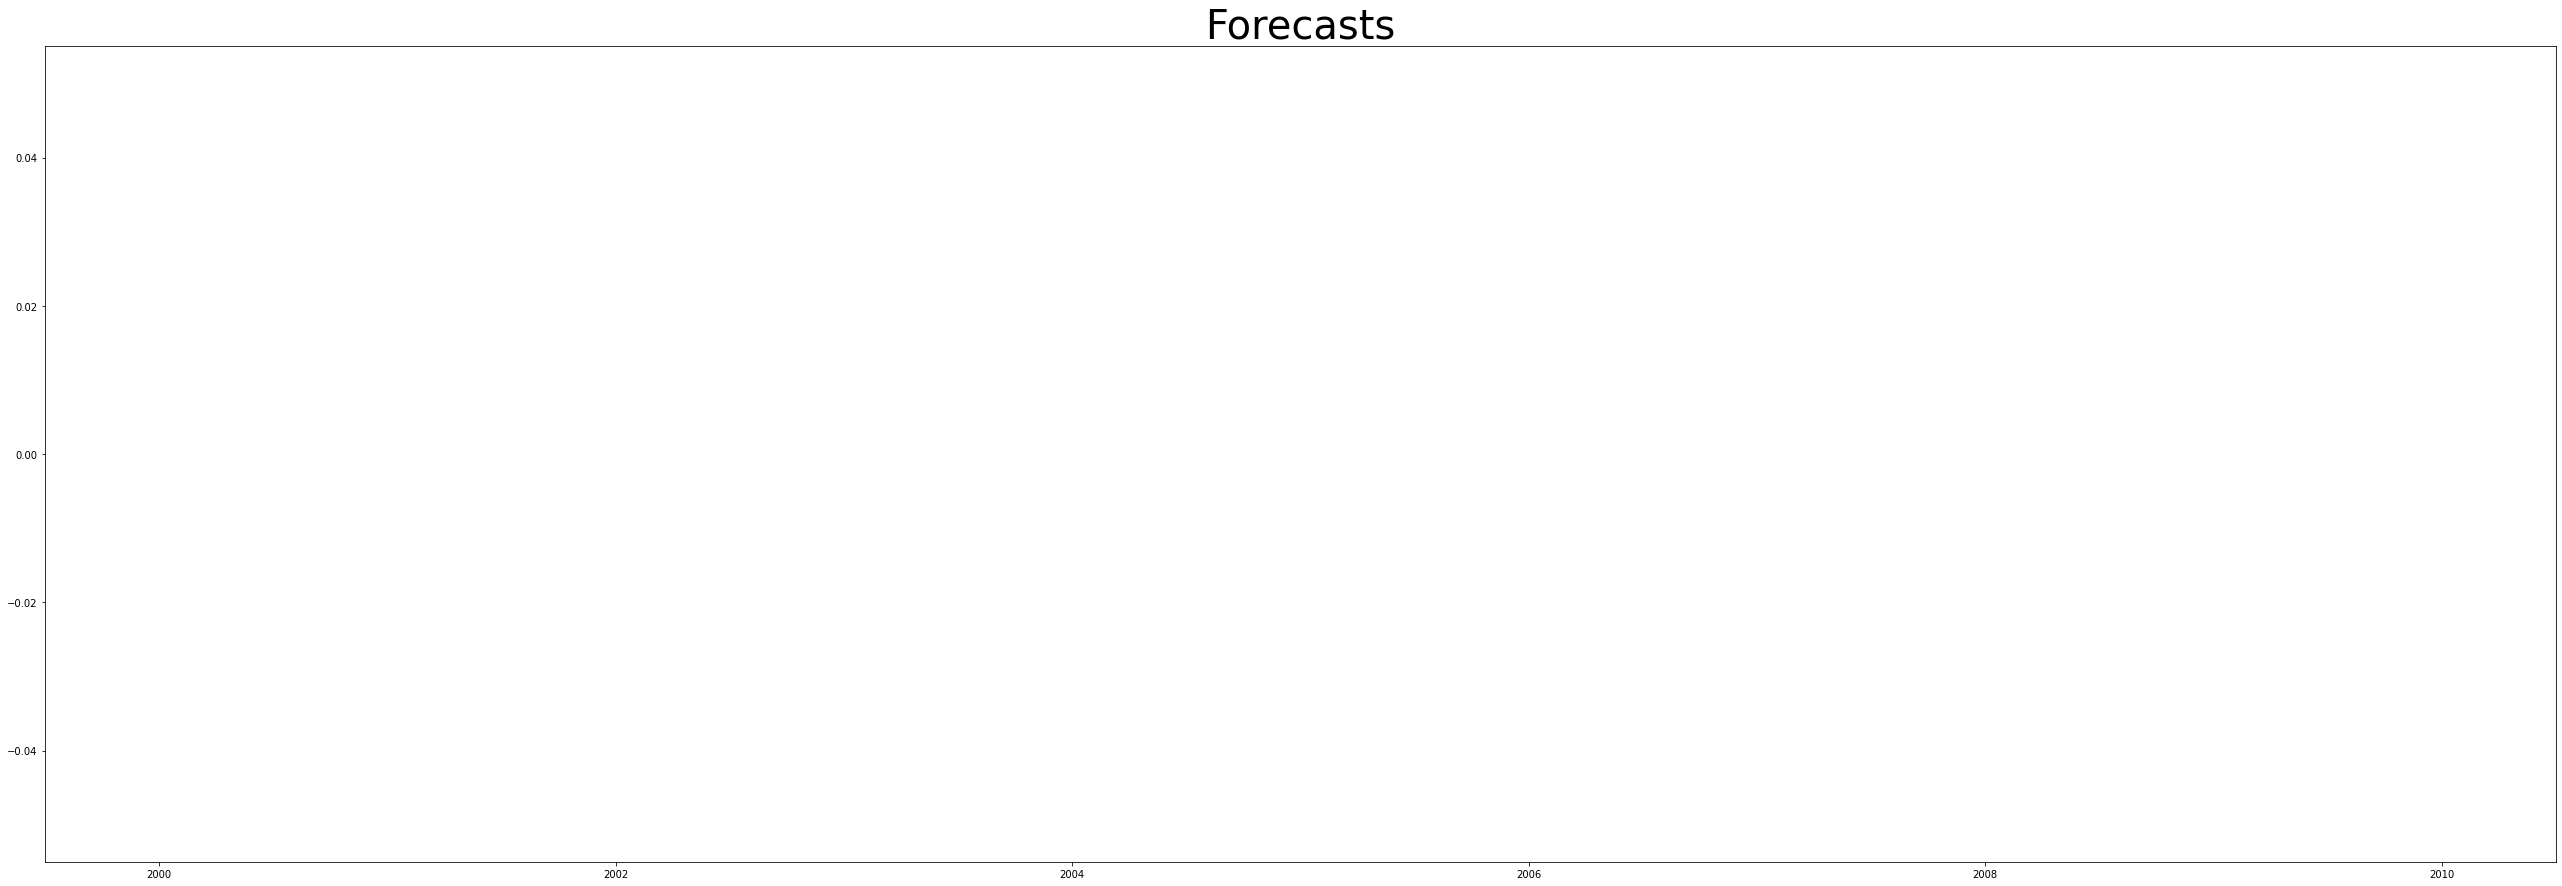

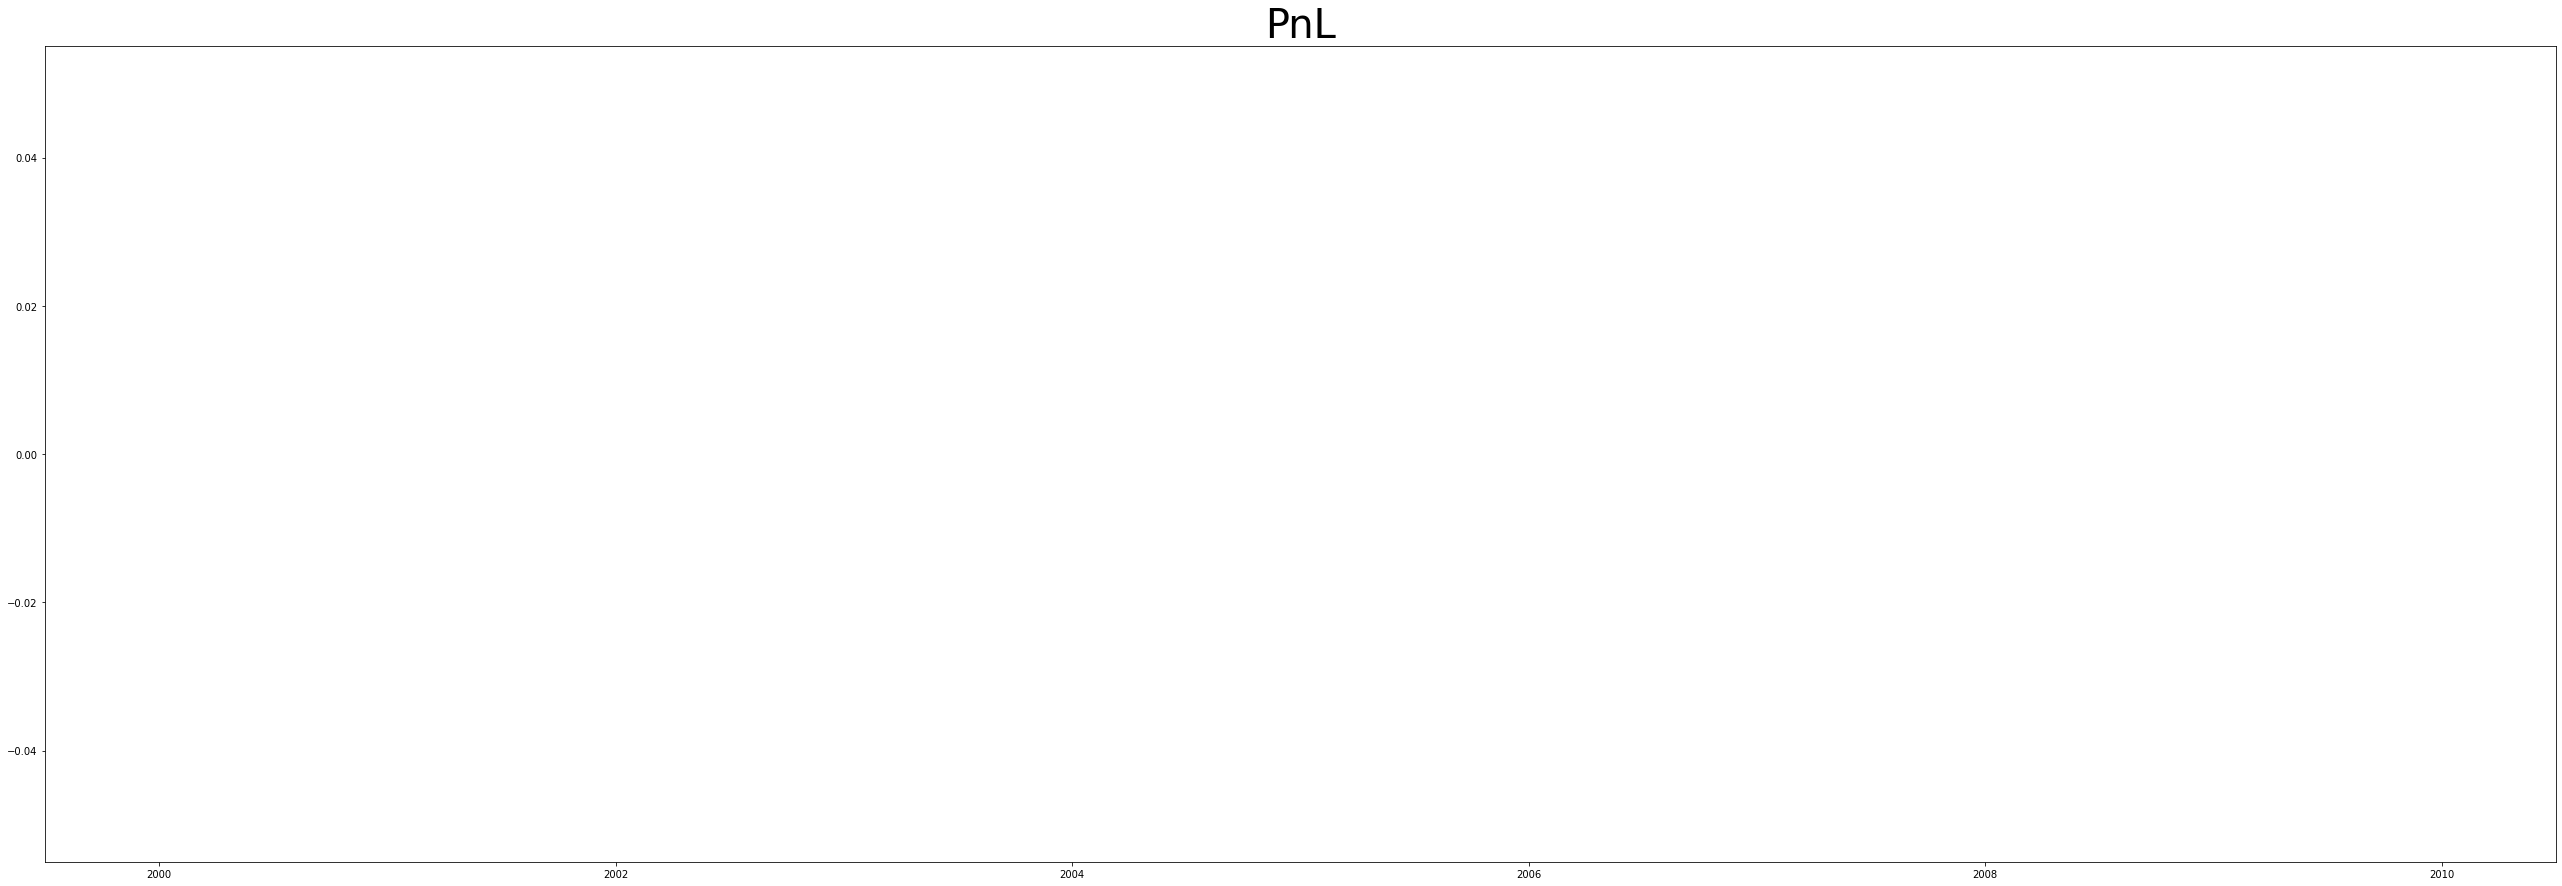

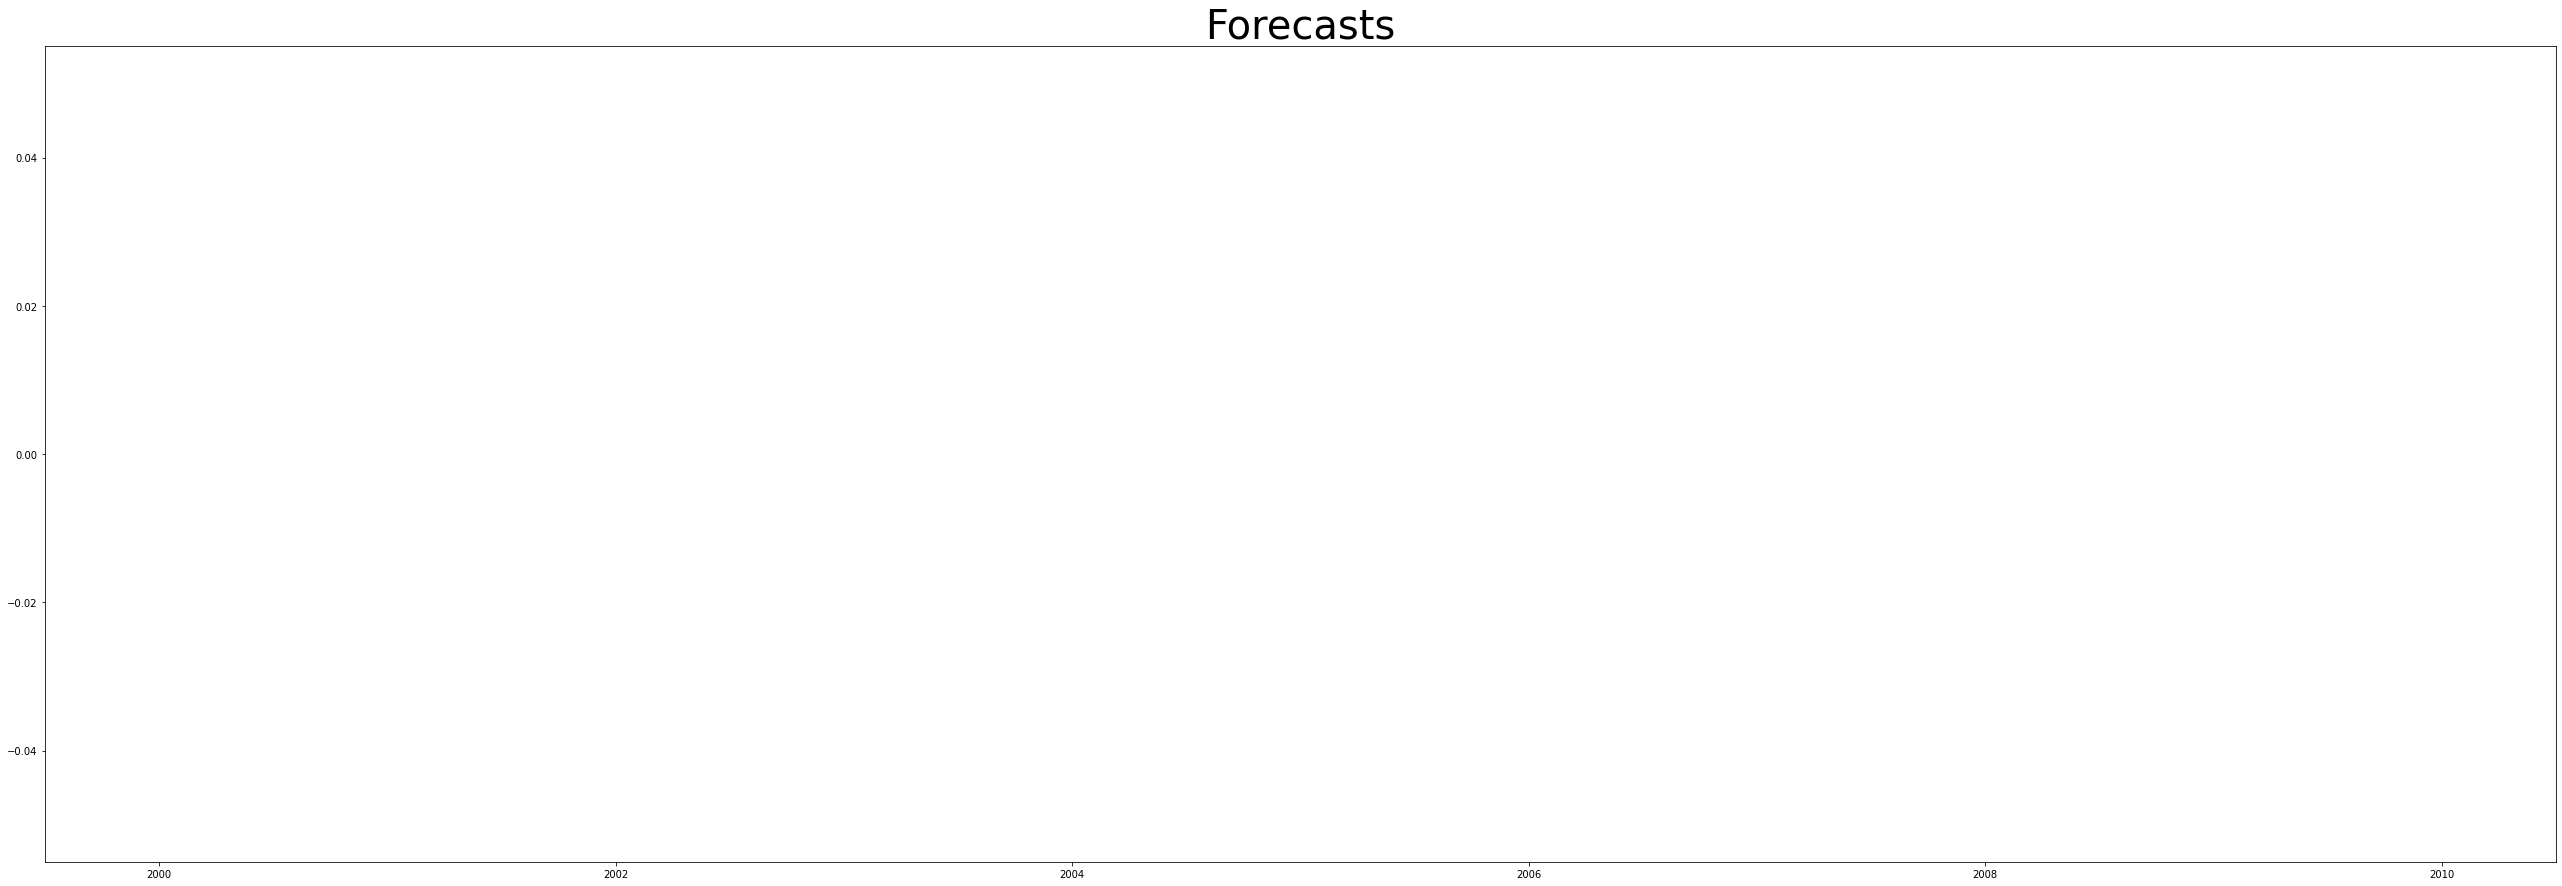

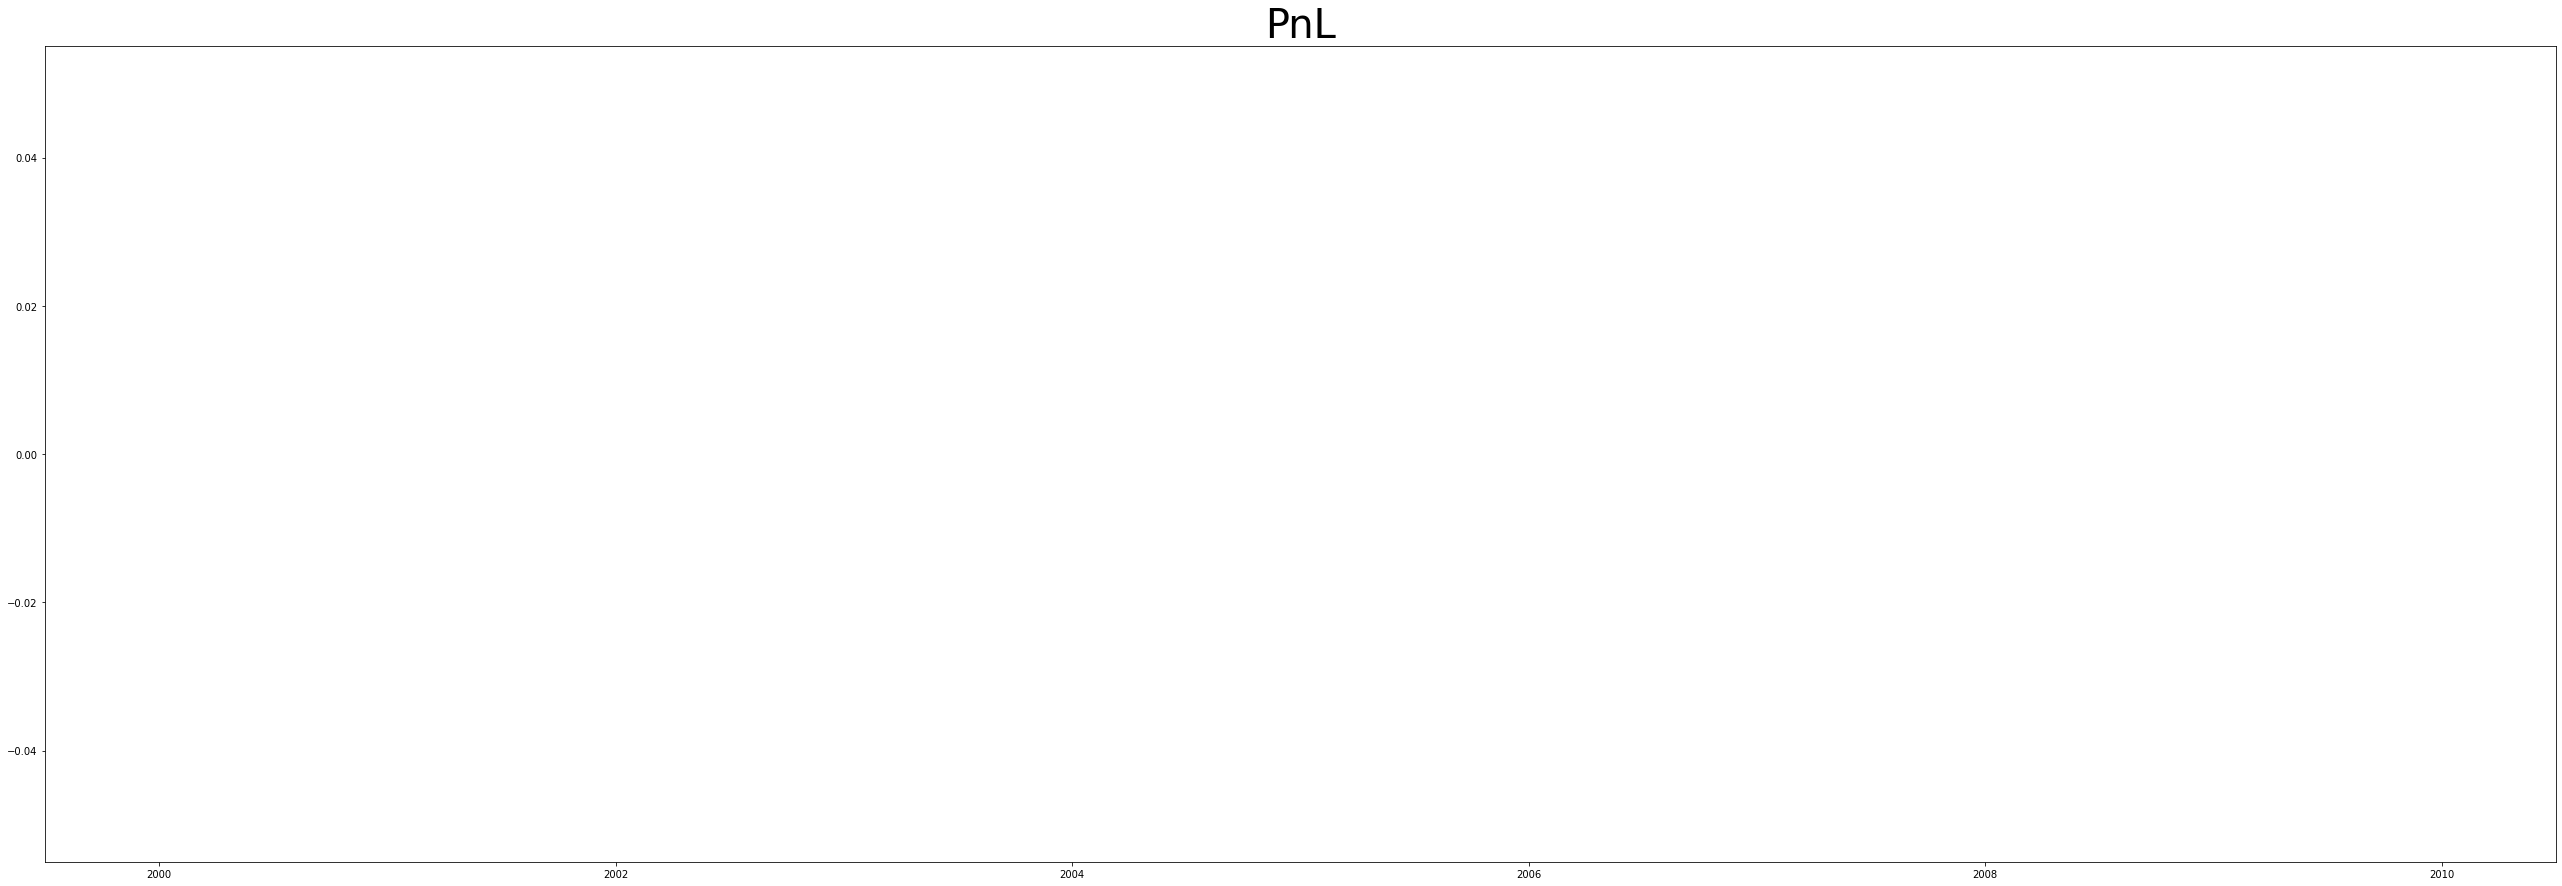

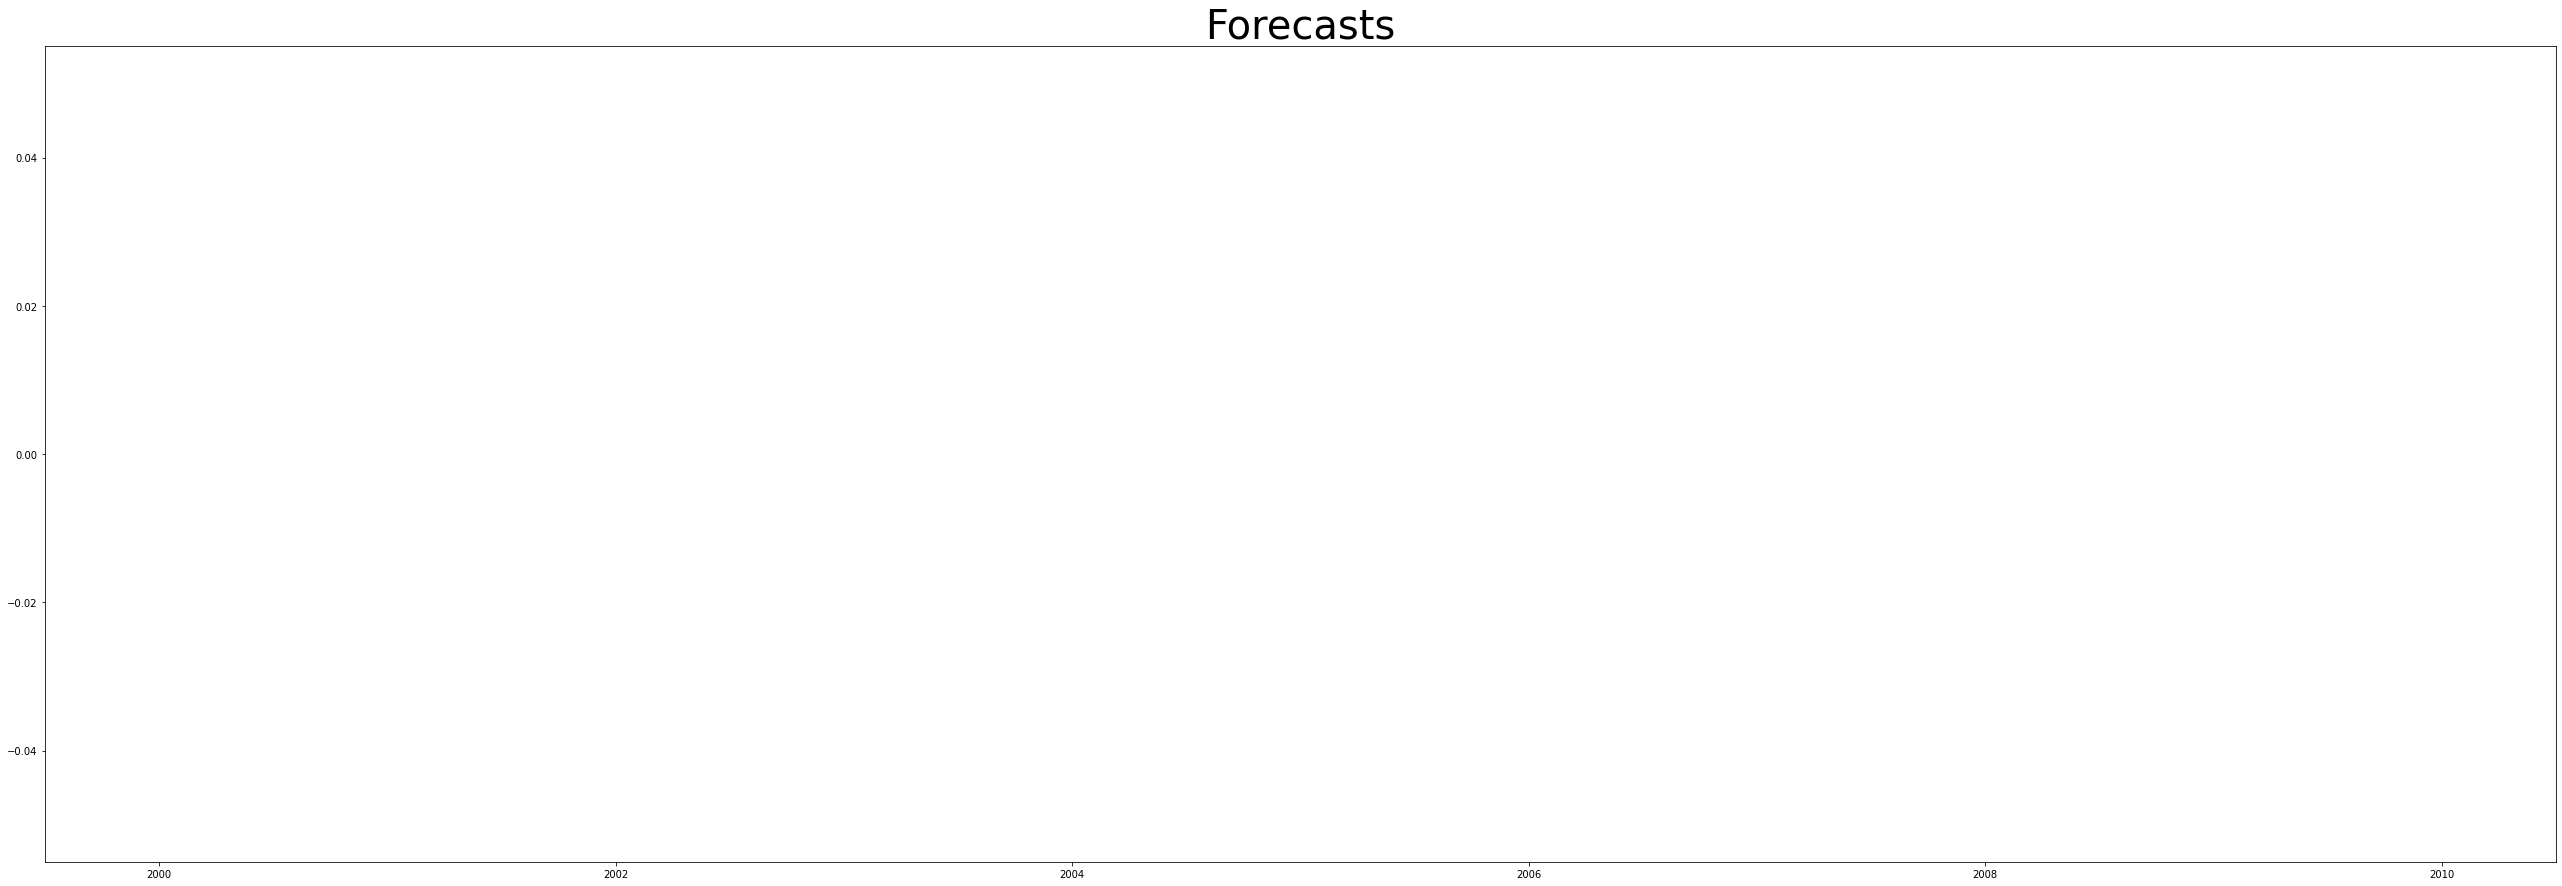

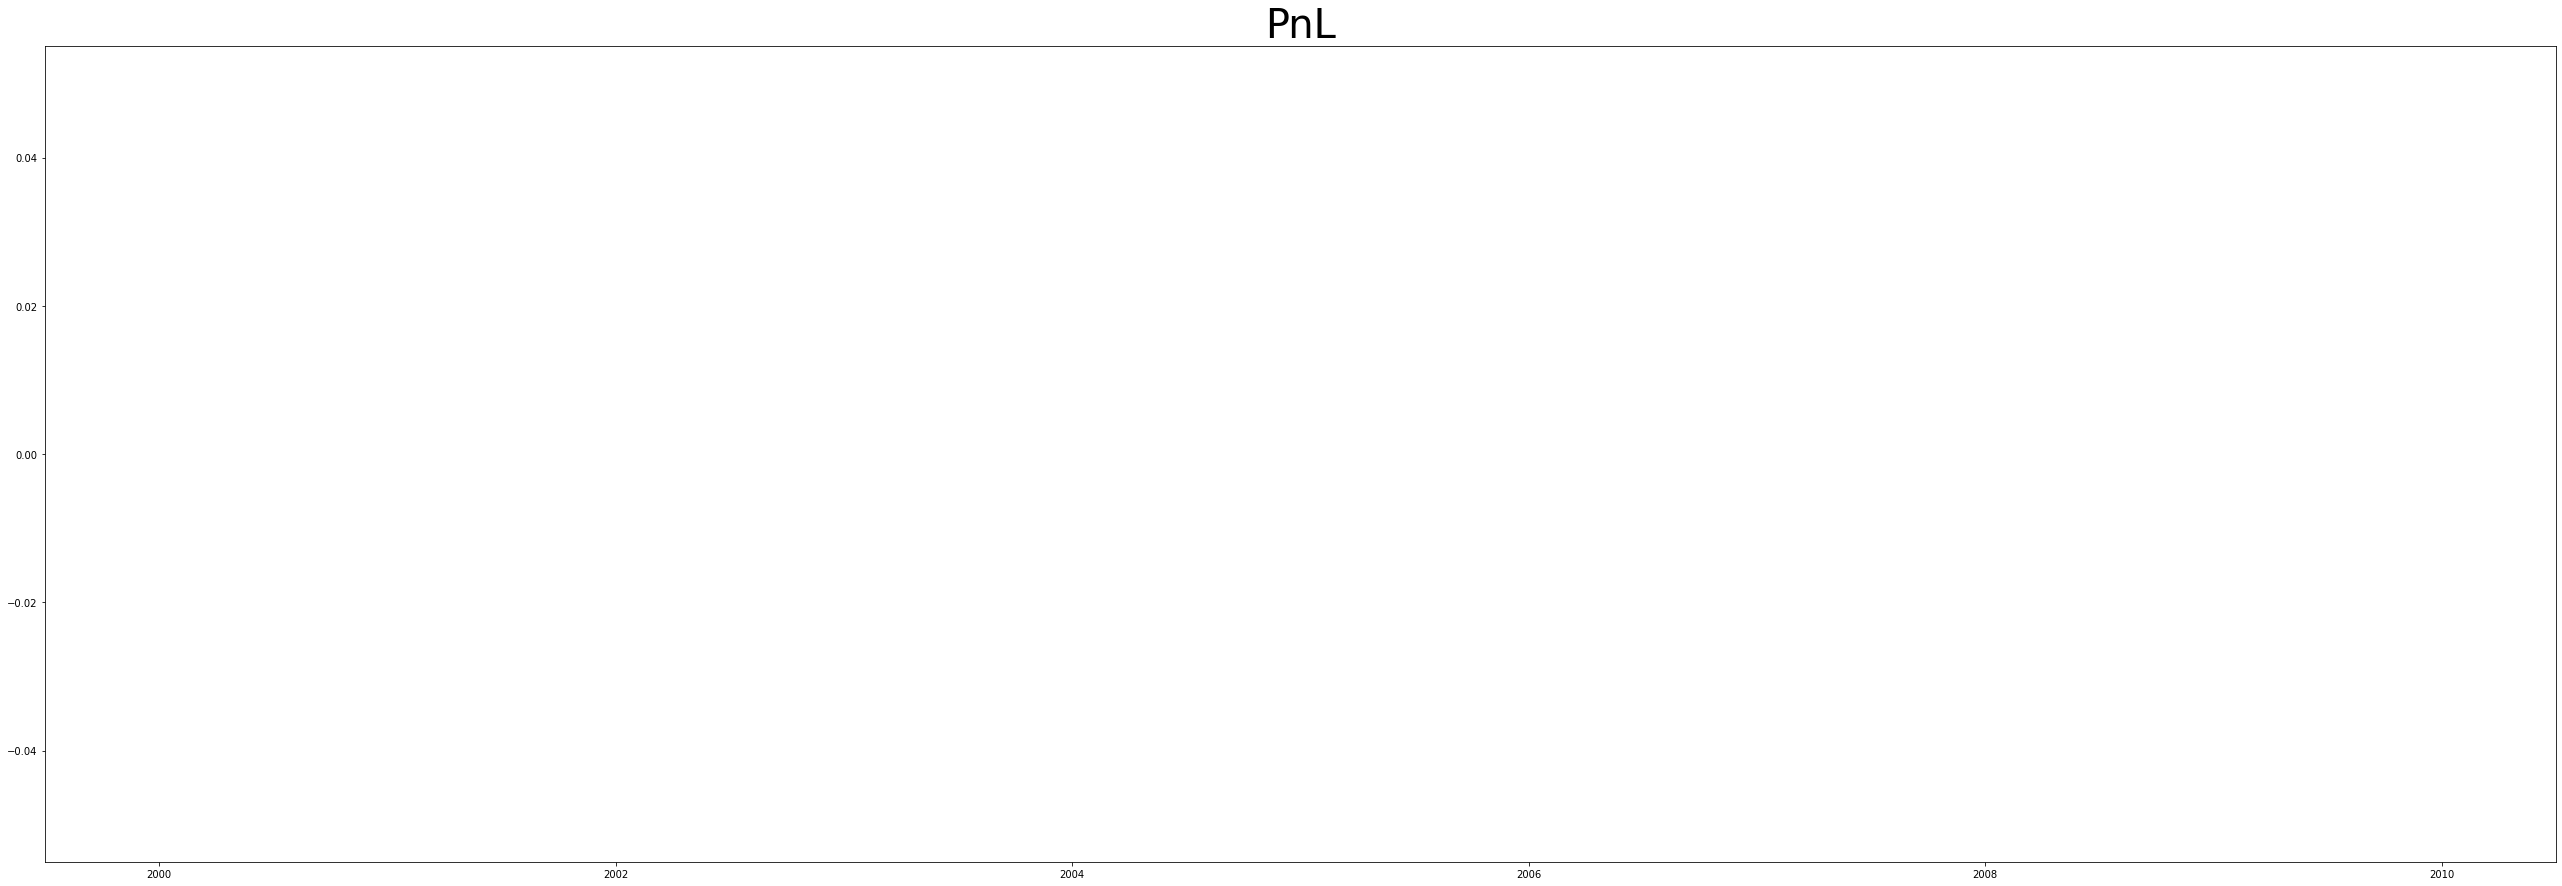

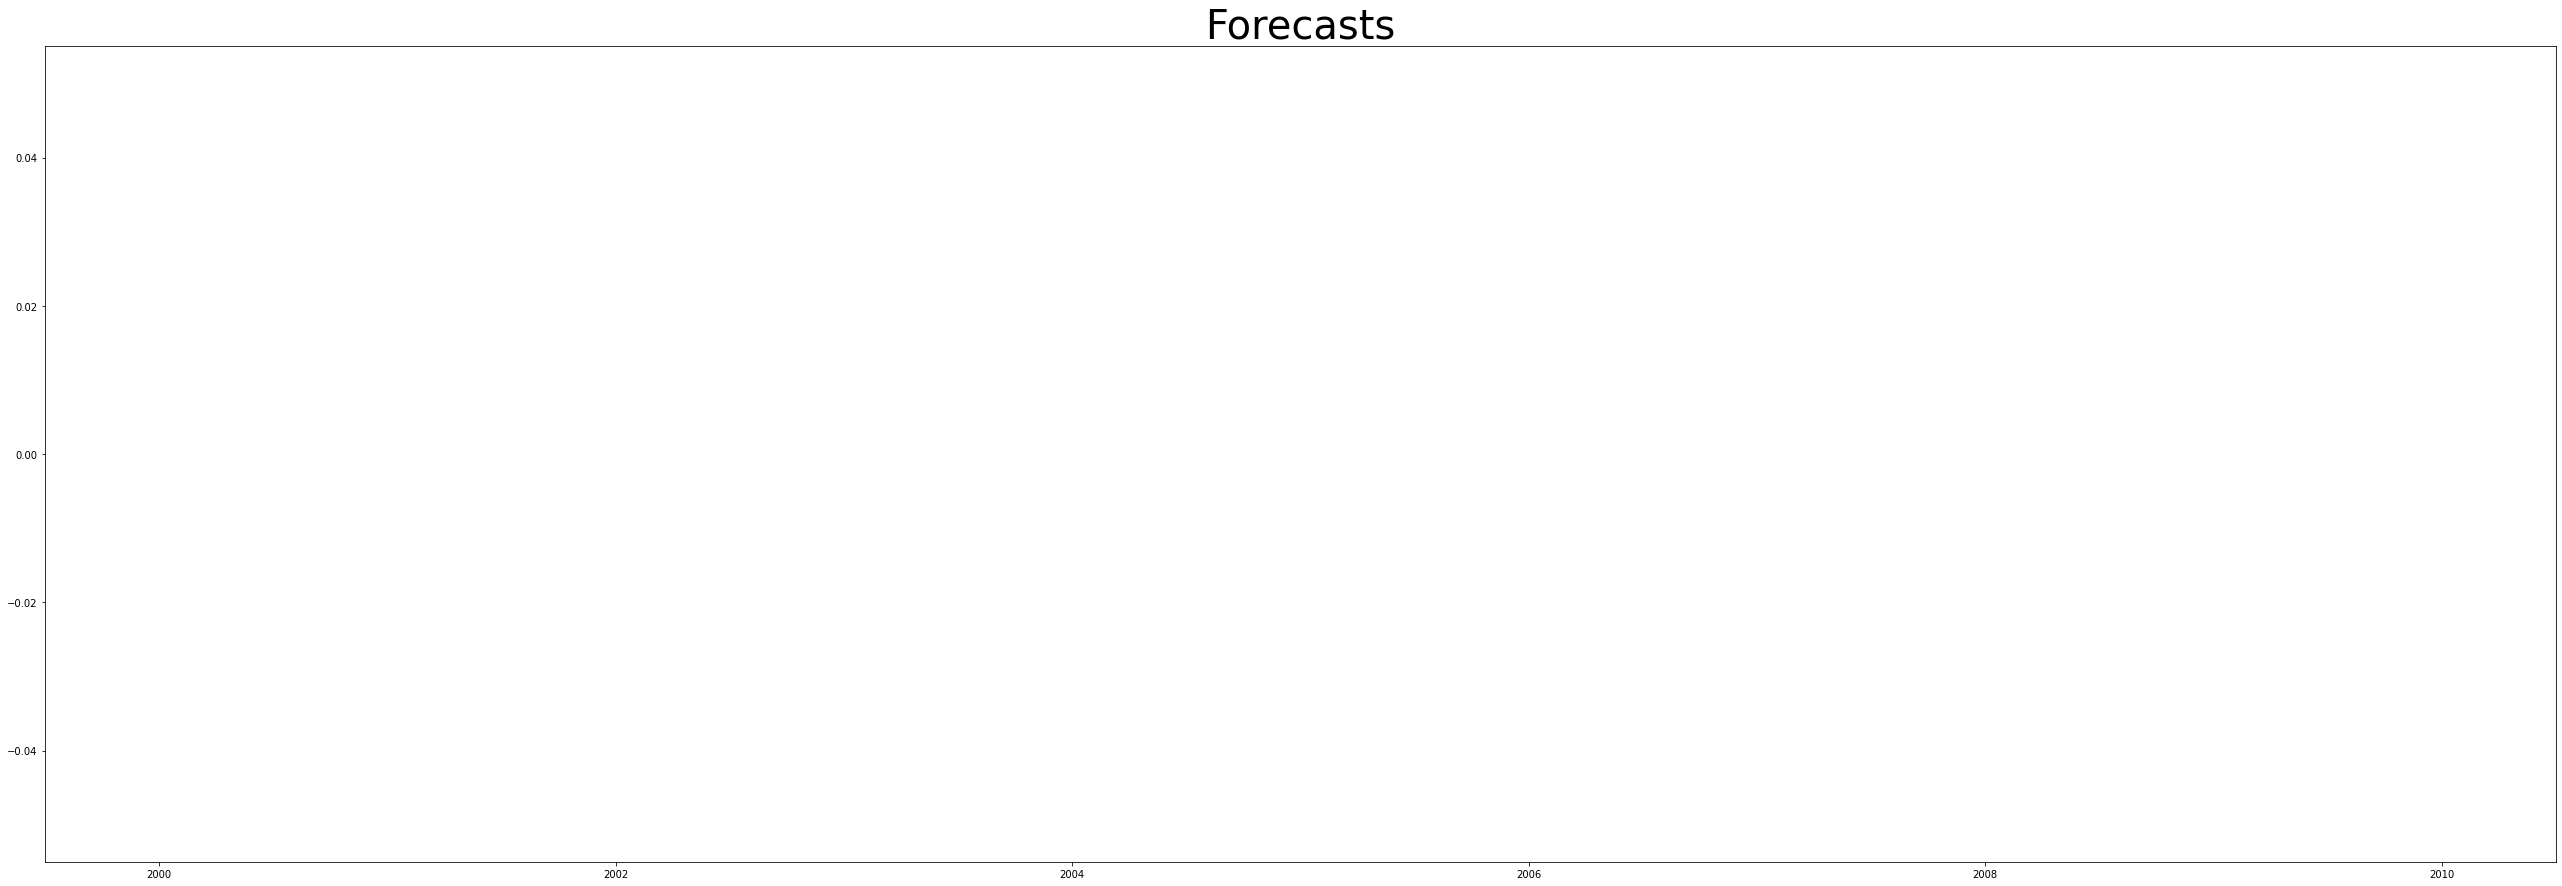

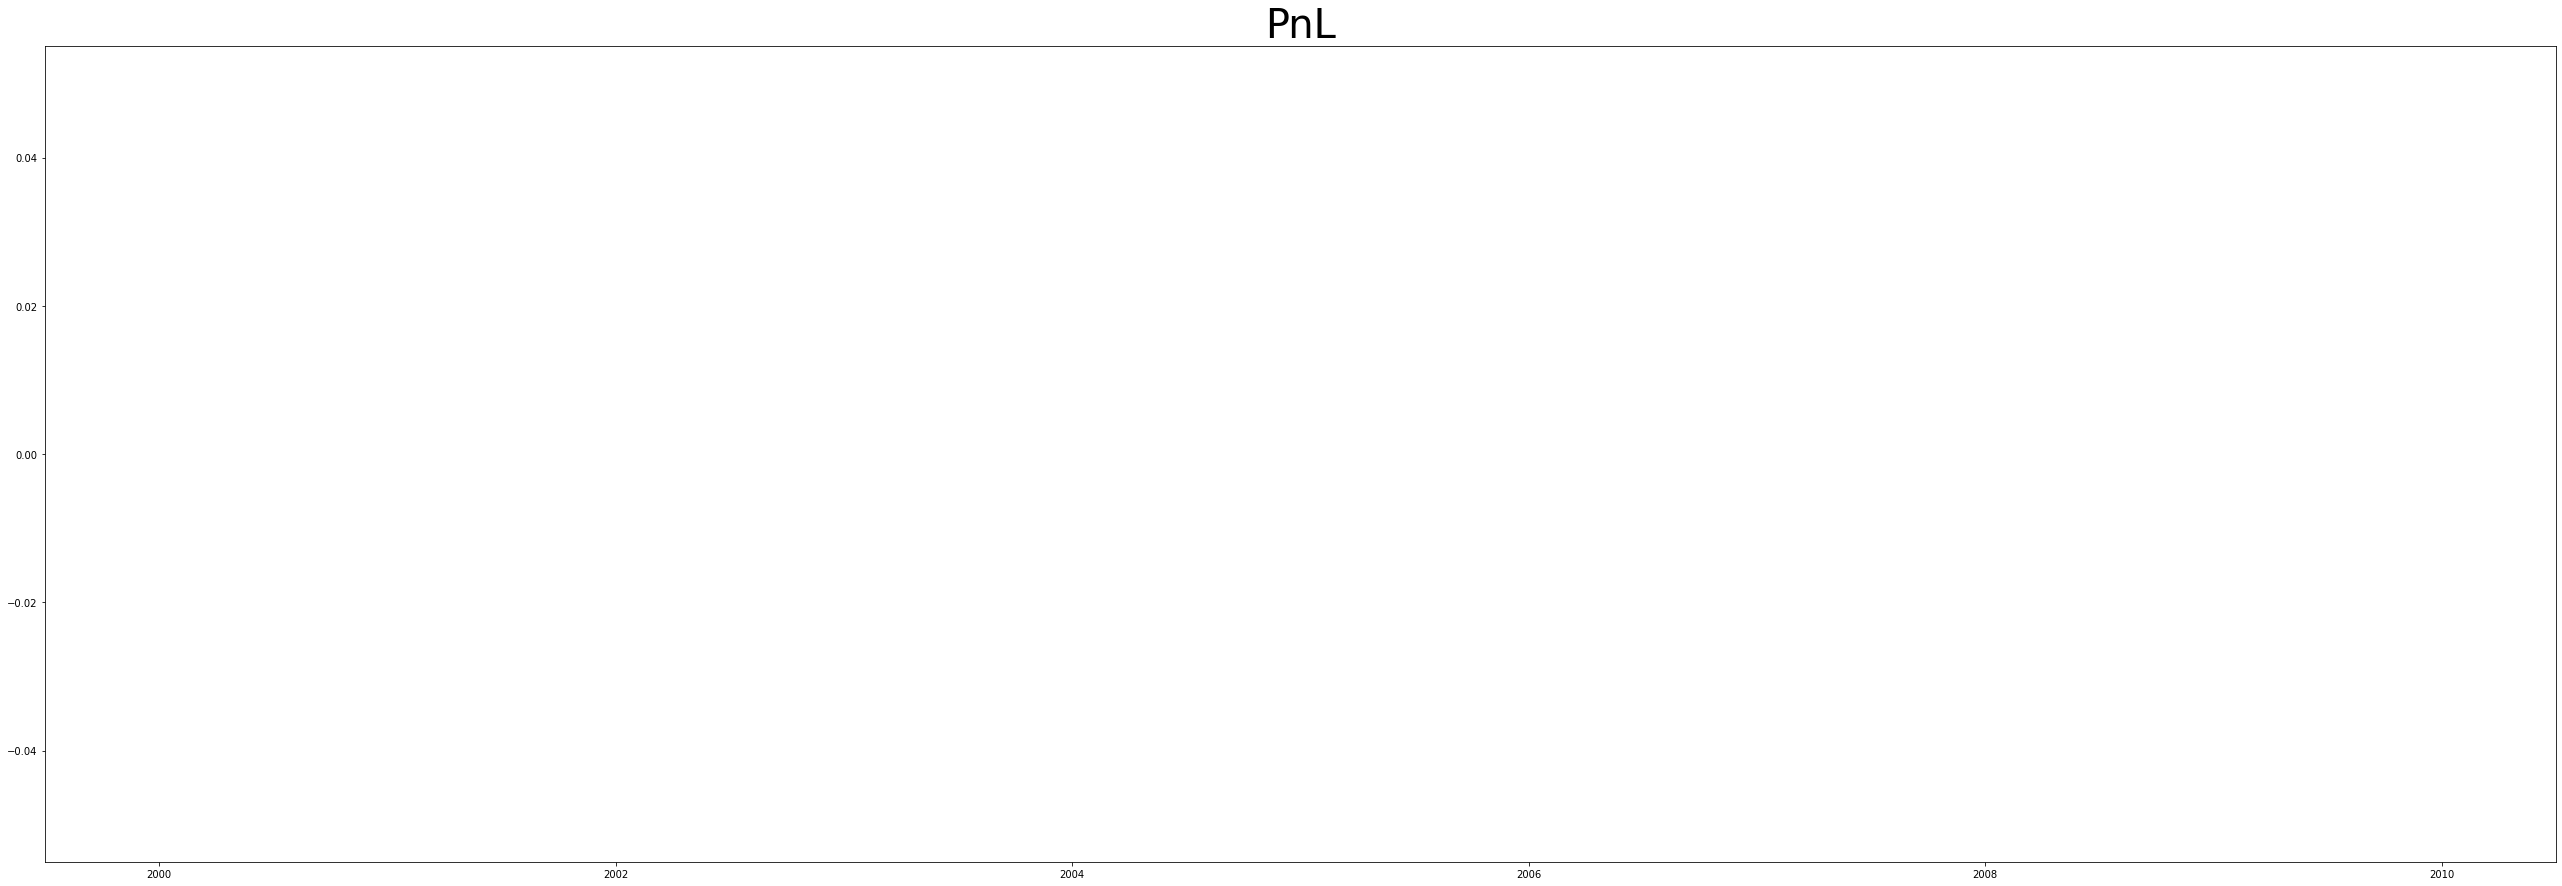

In [26]:
for i in range(10):
    plt.figure(figsize=(45,15))

    plt.plot(forcast_df['close'][i*1000:(i+1)*1000])
    plt.plot(forcast_df['pointForecast'][i*1000:(i+1)*1000])
    plt.title('Forecasts',fontsize=40)
    plt.show()

    plt.figure(figsize=(45,15))

    plt.plot(pnl_df['pnl'][i*1000:(i+1)*1000].cumsum())
    plt.title('PnL',fontsize=40)
    plt.show()

# Metadata analysis

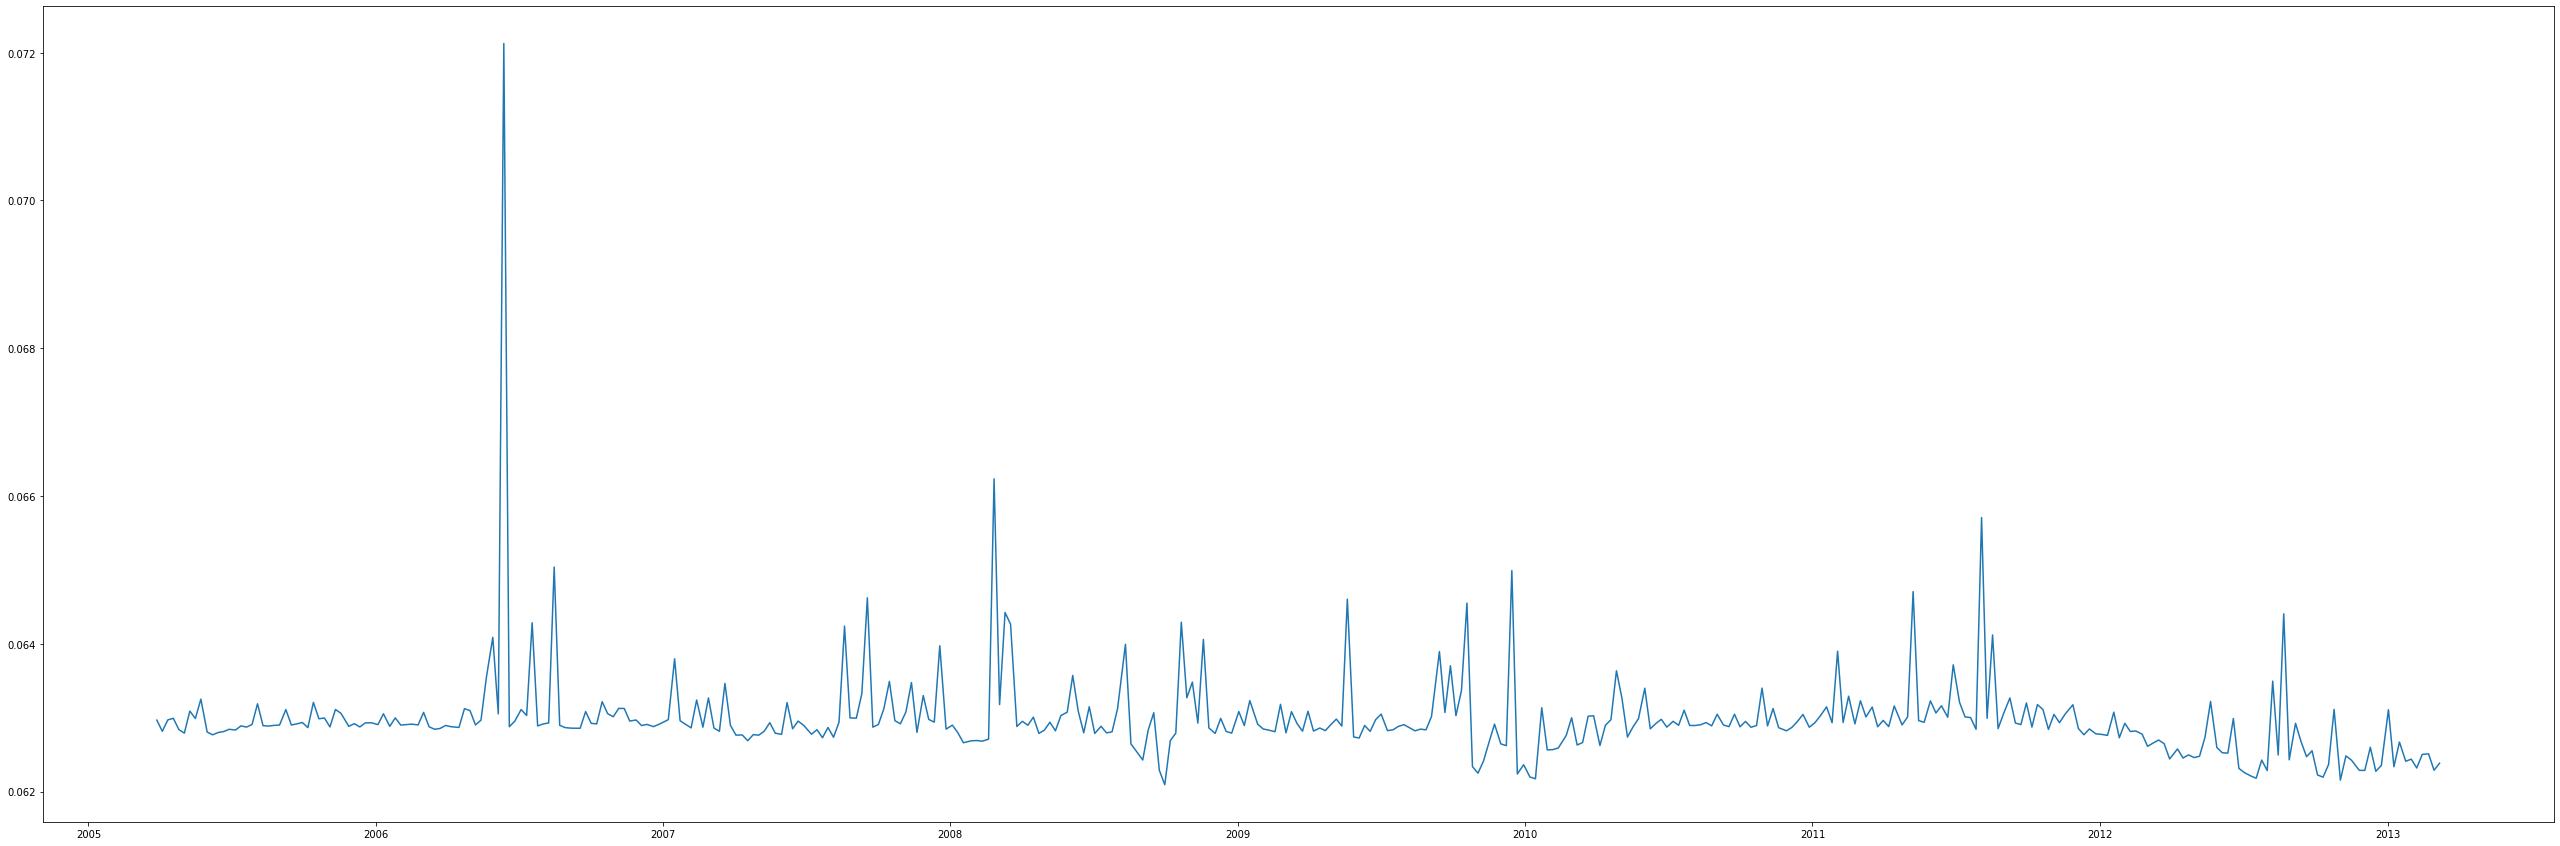

KeyError: 'ma.L1.close'

<Figure size 3240x1080 with 0 Axes>

In [27]:
plt.figure(figsize=(45,15))

for i in range(1,2):
    plt.plot(metadata_df[f'ar.L{i}.close'])

# plt.legend(['ar.L1.close','ar.L1.close'],fontsize=40)

plt.show()

plt.figure(figsize=(45,15))

for i in range(1,2):
    plt.plot(metadata_df[f'ma.L{i}.close'])
    
# plt.legend(['ma.L1.close','ma.L1.close'],fontsize=40)

plt.show()

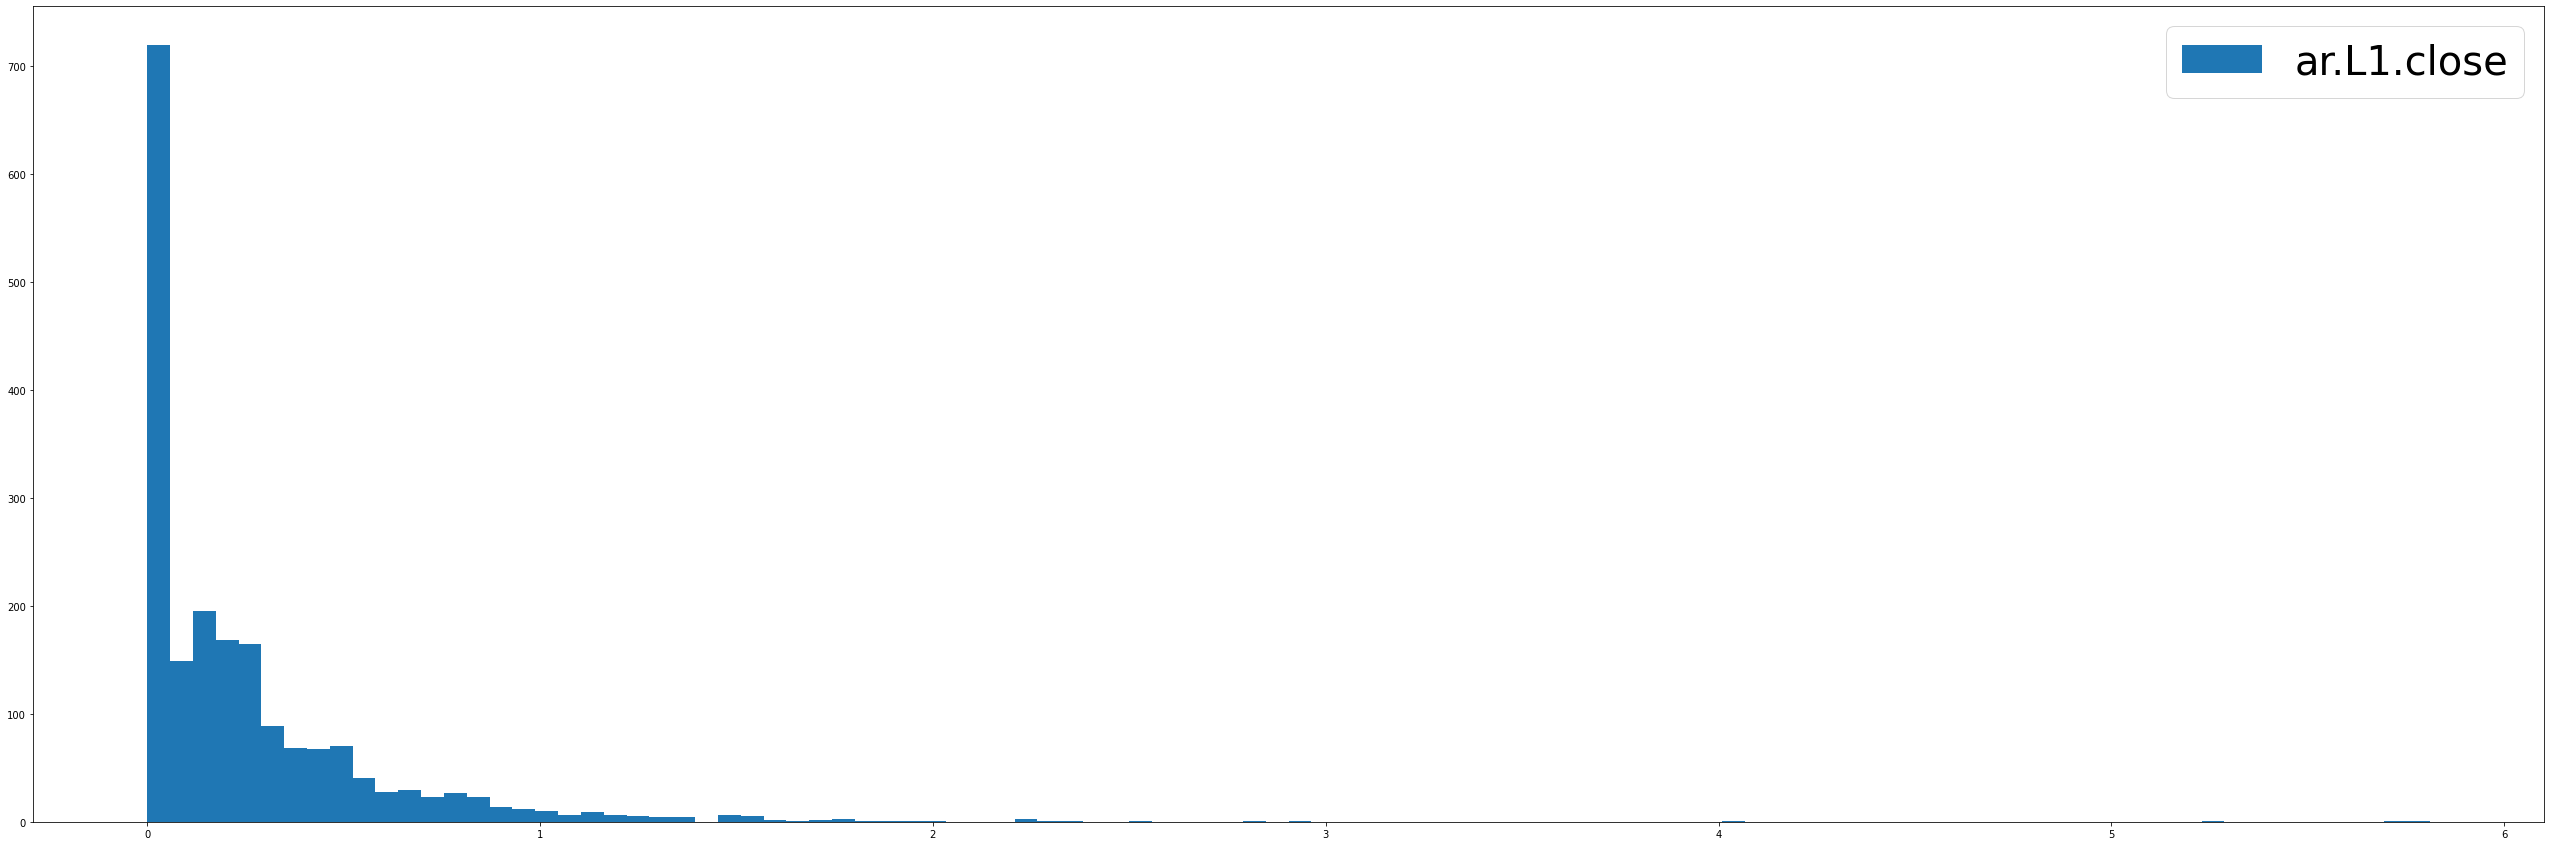

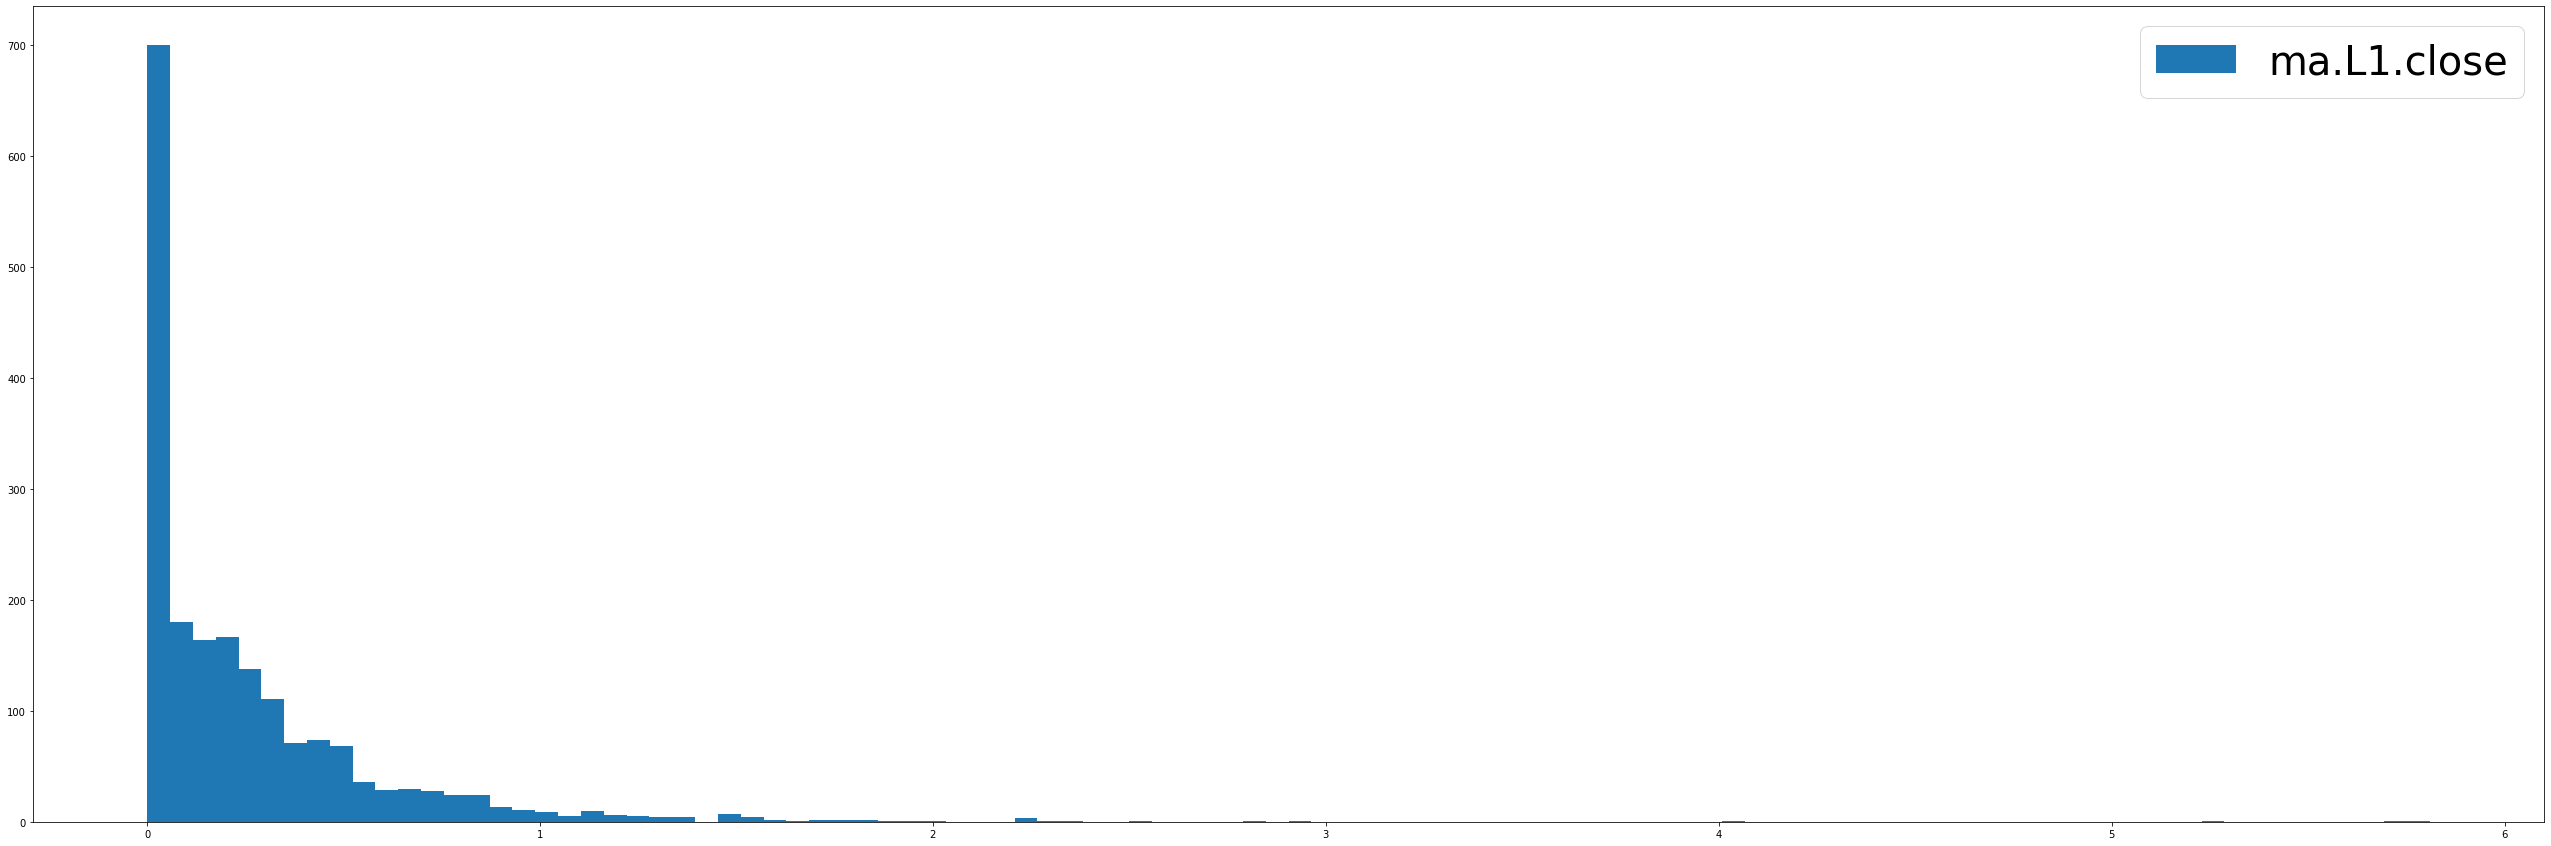

In [ ]:
plt.figure(figsize=(45,15))

for i in range(1,2):
    plt.hist(metadata_df[f'ar.L{i}.close'],bins=100)

plt.legend(['ar.L1.close','ar.L1.close'],fontsize=40)

plt.show()

plt.figure(figsize=(45,15))

for i in range(1,2):
    plt.hist(metadata_df[f'ma.L{i}.close'],bins=100)
    
plt.legend(['ma.L1.close','ma.L1.close'],fontsize=40)

plt.show()